In [36]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
# import seaborn as sns; sns.set();
# # sns.set_style("white");
# import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-ticks')

import pandas as pd
import numpy as np
import scipy.stats as stats
from collections import OrderedDict

import os
import json
import itertools

read_series = {
    'index_col': 0,
    'header': None,
    'squeeze': True,
}

read_df = {
    'index_col': 0,
}

kw_label = {
    'x' : -0.1,
    'y' : 1.15,
    'va': 'top',
    'ha': 'right',
    'fontsize'  : 20,
    'fontweight': 'bold', # 'normal', 'bold'
}

kw_plot = {
    'shade' : False,
    'alpha' : 0.9,
    'legend': False,
    'lw': 3,
}

# font_size
fs_title = 18
fs_legend = 16
fs_tick = 13

In [37]:
import matplotlib

# import matplotlib.pyplot as plt
# import seaborn as sns; sns.set(color_codes=True)

plt.style.use('seaborn-whitegrid')
matplotlib.rcParams['xtick.major.size'] = 6.0
matplotlib.rcParams['ytick.major.size'] = 5.0 #0.0

In [38]:
ch_list = ['2L', '2R', '3L', '3R', 'X']
prior = 'normal' # normal or uniform
theta_list = [0.1, 1.0, 10.0]

is_neutral = False
postfix = '_neutral' if is_neutral else ''

drop_missing = True
per_bp = 1e-2

load_overlap = True
load_tajima = True

# Load data

## ABC inference errors on simulated data
Neutral if `is_neutral = True` and generalized Ewens

In [4]:
path = '~/Desktop/phd/text/pics_data/'

theta_arch     = {}
beta_arch      = {}
log_gamma_arch = {}
for th in theta_list:
    theta_arch[th] = pd.read_csv(os.path.join(path, 'theta_arch_{th:0.1f}{p}.csv'.format(th=th, p=postfix)), index_col=0)
    theta_arch[th].columns = theta_arch[th].columns.astype(float)
    
    beta_arch[th] = pd.read_csv(os.path.join(path, 'beta_arch_{th:0.1f}{p}.csv'.format(th=th, p=postfix)), index_col=0)
    beta_arch[th].columns = beta_arch[th].columns.astype(float)
    
    log_gamma_arch[th] = pd.read_csv(os.path.join(path, 'log_gamma_arch_{th:0.1f}{p}.csv'.format(th=th, p=postfix)), index_col=0)
    log_gamma_arch[th].columns = log_gamma_arch[th].columns.astype(float)

## Mask

In [5]:
mask = {}
for ch in ch_list:
    d = {
        'filepath_or_buffer': 'data/chr_{ch}_mask.csv'.format(ch=ch),
        'index_col': 0,
        'header': None,
        'squeeze': True,
    }
    mask[ch] = pd.read_csv(**d)

In [6]:
print('Mask coverage per chromosome')
for k, v in mask.items():
    print('{ch:>2}: {x:0.2f}'.format(ch=k, x=v.mean()))

Mask coverage per chromosome
2L: 0.68
2R: 0.73
3L: 0.70
3R: 0.76
 X: 0.63


## Tajima

In [7]:
path = '~/Desktop/phd/chr_data/cdata'
d = dict(index_col=0, squeeze=True)

tajima = {
    ch: pd.read_csv(os.path.join(path, 'chr_{}_tajima.csv'.format(ch)), **d).loc[mask[ch]] for ch in ch_list
}
if per_bp:
    for k, v in tajima.items():
        v *= per_bp

## Watterson

In [8]:
path = '~/Desktop/phd/chr_data/cdata'
d = dict(index_col=0, squeeze=True)

watterson = {
    ch: pd.read_csv(os.path.join(path, 'chr_{}_watterson.csv'.format(ch)), **d).loc[mask[ch]] for ch in ch_list
}
if per_bp:
    for k, v in watterson.items():
        v *= per_bp

## Inferred parameters: Neutral ABC

In [9]:
param_infer_neutral = {}
for ch in ch_list:
    d = {
        'filepath_or_buffer': '~/Desktop/phd/figures/data/chr_{ch}_param_infer_neutral_{t}.csv'.format(ch=ch, t=prior[0]),
        'index_col': 0,
    }
    x = pd.read_csv(**d)
    x = x.astype(float)
    if drop_missing:
        x = x.loc[mask[ch]]
    if per_bp:
        x.theta *= per_bp
    param_infer_neutral[ch] = x

In [10]:
print('Neutral ABC')
print('Chr  Mean     Medain')
for k, v in param_infer_neutral.items():
    print('{k:>2}   {mean:0.4f}   {median:0.4f}'.format(k=k, mean=v.theta.mean(), median=v.theta.median()))

Neutral ABC
Chr  Mean     Medain
2L   0.0154   0.0091
2R   0.0120   0.0072
3L   0.0126   0.0073
3R   0.0112   0.0069
 X   0.0152   0.0077


## Inferred parameters: Generalized ABC

In [11]:
param_infer = {}
for ch in ch_list:
    d = {
        'filepath_or_buffer': 'data/chr_{ch}_param_infer_{t}.csv'.format(ch=ch, t=prior[0]),
        'index_col': 0,
    }
    x = pd.read_csv(**d)
    x = x.astype(float)
    if drop_missing:
        x = x.loc[mask[ch]]
    if per_bp:
        x.theta *= per_bp
    param_infer[ch] = x

In [12]:
print('ABC')
print('Chr  Mean     Medain')
for k, v in param_infer.items():
    print('{k:>2}   {mean:0.4f}   {median:0.4f}'.format(k=k, mean=v.theta.mean(), median=v.theta.median()))

ABC
Chr  Mean     Medain
2L   0.0348   0.0295
2R   0.0300   0.0254
3L   0.0295   0.0241
3R   0.0299   0.0247
 X   0.0372   0.0312


## Chromosome posterior

In [13]:
par_sim = pd.read_csv('/Users/pasha/Desktop/phd/sim_data/par_sim_n.csv', index_col=0)
par_sim.head()

,theta,beta,gamma
0,0.764259,12.483932,1.114384e-02
1,1.705726,16.225512,6.559670e-07
2,138.030538,3.391064,1.096903e-01
3,0.607393,29.292360,8.046792e-05
4,0.762254,3.486763,1.455272e-01


In [14]:
posterior = {}
for ch in ch_list:
    d = {
        'filepath_or_buffer': '/Users/pasha/Desktop/phd/chr_data/chr_{ch}_post_idx.csv'.format(ch=ch, t=prior[0]),
        'index_col': 0,
    }
    x = pd.read_csv(**d)
    x = x.astype(int)
    if drop_missing:
        x = x.loc[mask[ch]]
    posterior[ch] = x

In [15]:
posterior['2L'].head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
65,270999,967956,899899,645694,539372,967864,226321,615412,458652,719263,...,25266,615761,521326,93007,962501,70059,447430,386158,529777,982192
66,724691,269197,284649,149729,753788,198444,559578,429218,989520,331994,...,225125,460271,129992,77906,99050,51687,246832,854610,960313,455714
71,444970,962481,424145,98123,26949,809311,402679,904693,721386,276126,...,569037,413881,547004,154039,454080,541941,290283,320908,334459,455778
73,929322,37157,145182,405711,209289,929446,6156,460059,199973,915400,...,271838,719958,628018,754875,875133,585404,504755,915139,943428,51760
74,961351,81896,190308,743751,272300,243281,381359,439104,318441,527933,...,931341,550870,805418,737145,103337,657874,236347,424759,223568,879177


In [16]:
post_idx = pd.concat(posterior, ignore_index=True)

In [17]:
%%time

post = {}
for x in ['theta', 'beta', 'gamma']:
    tmp = post_idx.apply(lambda row: par_sim.loc[row, x].values)
    post[x] = np.array(tmp).flatten()
post = pd.DataFrame(post)

if per_bp:
    post['theta'] *= per_bp

CPU times: user 16.6 s, sys: 6.54 s, total: 23.1 s
Wall time: 20.9 s


In [18]:
print('P[Ns<1] = {:0.3f}'.format((post.beta < 1).mean()))
print('P[Ns<1 | Ns<15] = {:0.3f}'.format((post.beta < 1).mean() / (post.beta < 15).mean()))

P[Ns<1] = 0.058
P[Ns<1 | Ns<15] = 0.164


In [19]:
post.gamma[post.gamma > 0.9999]

208865      0.999931
470160      0.999968
591287      0.999931
616786      0.999968
650831      0.999931
              ...   
82791848    0.999931
82875793    0.999901
82903368    0.999931
82912570    0.999968
82939537    0.999931
Name: gamma, Length: 1165, dtype: float64

In [20]:
post.head()

,theta,beta,gamma
0,0.004408,73.219701,2.386812e-06
1,0.004445,73.630135,1.252183e-05
2,0.004382,76.555412,4.565775e-13
3,0.004411,77.580524,1.635771e-12
4,0.004292,70.412100,4.770181e-10


In [21]:
# kw_plot = {
#     'shade' : False,
#     'alpha' : 0.9,
#     'legend': False,
#     'lw': 3,
# }

# sns.kdeplot(post, gridsize=100, **kw_plot)

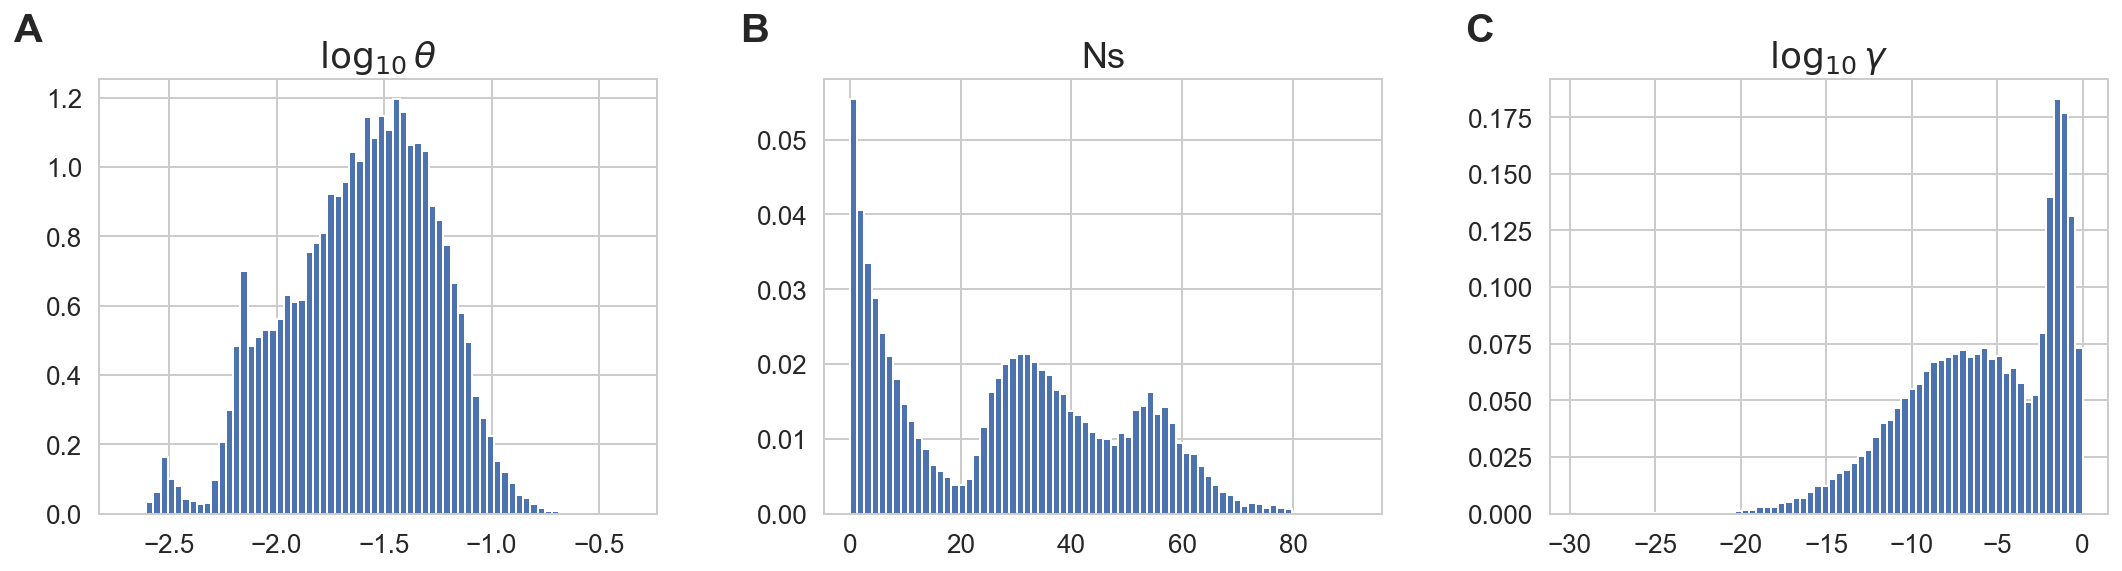

In [22]:
n_col = 3
n_row = 1
fig, ax = plt.subplots(nrows=n_row, ncols=n_col, figsize=(6*n_col, 4*n_row))

kw_label = {
    'x' : -0.1,
    'y' : 1.15,
    'va': 'top',
    'ha': 'right',
    'fontsize'  : 20,
    'fontweight': 'bold', # 'normal', 'bold'
}

# font_size
fs_title = 18
fs_legend = 16
fs_tick = 13

n_bins = 70

x = ax[0]
np.log10(post.theta).hist(bins=n_bins, density=True, ax=x)
x.set_title(r'$\log_{10} \, \theta$', fontsize=fs_title)
x.text(s='A', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

x = ax[1]
post.beta.hist(bins=n_bins, density=True, ax=x)
x.set_title('Ns', fontsize=fs_title)
x.text(s='B', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

x = ax[2]
np.log10(post.gamma).hist(bins=n_bins, density=True, ax=x)
x.set_title(r'$\log_{10} \, \gamma$', fontsize=fs_title)
x.text(s='C', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

plt.subplots_adjust(wspace=0.3)
plt.savefig('figures/chr_posterior.pdf', bbox_inches='tight', transparent=True);

## Number of mutations per sequence

In [23]:
n_mut_avg = {}
n_non_na = {}

path = '~/Desktop/phd/chr_data'
for ch in ch_list:
    n_mut = pd.read_csv(os.path.join(path, 'chr_{}_n_mut.csv'.format(ch)), **read_series)
    n_non_na[ch] = pd.read_csv(os.path.join(path, 'chr_{}_n_non_na.csv'.format(ch)), **read_series)
    n_mut_avg[ch] = n_mut / n_non_na[ch]

In [24]:
for ch in ch_list:
    x1 = pd.read_csv('~/Desktop/phd/chr_data/chr_{}_n_mut.csv'.format(ch), **read_series)
    x2 = pd.read_csv('~/Desktop/phd/chr_data/cdata/chr_{}_n_mut.csv'.format(ch), index_col=0).iloc[:, 0]

    print(x1.equals(x2), ch)

True 2L
True 2R
True 3L
True 3R
True X


## Functional regions

In [25]:
def load_data(name):
    df = pd.read_csv('~/Desktop/phd/dmel/annotation/{}.csv'.format(name), index_col=0)
    df['len'] = df.end - df.start + 1
    return df

gene = load_data('gene')
intergenic = load_data('intergenic')

def get_overlap(features, windows):
    features = features.copy()
    features = features.sort_values('start')
    features = features.reset_index()
    i_max = features.shape[0]
    
    overlap = {
        'full': [],
        'part': [],
        'none': [],
    }

    for k, w in windows.iterrows():
        below = features[features.start < w.start]
        if below.shape[0] == 0:
            overlap['none'].append(w.name)
        else:
            i_min = below.index[-1]
            for i in range(i_min, i_max):
                f = features.loc[i]
                if (w.start >= f.start and w.end <= f.end):
                    overlap['full'].append(w.name)
                    break
                if (w.start < f.start and w.end >= f.start) or (w.start <= f.end and w.end > f.end):
                    overlap['part'].append(w.name)
                    break
                if w.end < f.start or w.start > features.end.max():
                    overlap['none'].append(w.name)
                    break
    
    if set(windows.index) !=  set(itertools.chain.from_iterable(overlap.values())):
        print("Error: full + part + non doesn't constitute tiling.")

    return {k: list(set(v)) for k, v in overlap.items()}

In [26]:
%%time

path = 'data/overlap_tmp.json'

if load_overlap:
    with open(path, 'r') as f:
        overlap = json.load(f)
else:
    overlap = {}

    gene = load_data('gene')
    intergenic = load_data('intergenic')

    for ch in ch_list:
        print(ch)
        window = param_infer[ch].copy()
        window['start'] = window.index * 100
        window['end']   = window.index * 100 + 99

        overlap[ch] = {
            'gene'      : get_overlap(features=gene[gene.ch == ch], windows=window),
            'intergenic': get_overlap(features=intergenic[intergenic.ch == ch], windows=window),
        }

    with open(path, 'w') as f:
        json.dump(overlap, f)

CPU times: user 145 ms, sys: 32.5 ms, total: 177 ms
Wall time: 200 ms


Test against older version

In [27]:
# overlap1 = {}

# for ch in ch_list:
#     with open('/Users/pasha/Desktop/phd/figures/data/overlap_chr_{}.json'.format(ch), 'r') as f:
#         overlap1[ch] = json.load(f)

In [28]:
# c_x = 'X'
# f_x = 'intergenic'

# for k, v in overlap[c_x][f_x].items():
#     x1 = set(v) & set(mask[c_x][mask[c_x]].index)
#     x2 = set(overlap1[c_x][f_x][k]) & set(mask[c_x][mask[c_x]].index)
#     print(x1 == x2, k)

## Allelic counts histogram

In [29]:
hist = {}

for ch in ch_list:
    hist[ch] = pd.read_csv('~/Desktop/phd/chr_data/chr_{}_hist.csv'.format(ch), **read_df)

# ABC inference errors on simulated data

In [30]:
line = '*' * 10

print(line + ' theta error ' + line)
for k, v in theta_arch.items():
    arr = np.array(v).flatten()
    d = {
        'theta': k,
        'min'  : np.min(arr),
        'avg'  : np.mean(arr),
        'max'  : np.max(arr),
    }
    print('theta={theta:0.2f}\tmin={min:0.1E}\tmax={max:0.3f}\tavg={avg:0.3f}'.format(**d))

print(line + ' beta error ' + line)
for k, v in beta_arch.items():
    arr = np.array(v).flatten()
    d = {
        'theta': k,
        'min'  : np.min(arr),
        'avg'  : np.mean(arr),
        'max'  : np.max(arr),
    }
    print('theta={theta:0.2f}\tmin={min:0.1E}\tmax={max:0.3f}\tavg={avg:0.3f}'.format(**d))

print(line + ' log gamma error ' + line)
for k, v in log_gamma_arch.items():
    arr = np.array(v).flatten()
    d = {
        'theta': k,
        'min'  : np.min(arr),
        'avg'  : np.mean(arr),
        'max'  : np.max(arr),
    }
    print('theta={theta:0.2f}\tmin={min:0.1E}\tmax={max:0.3f}\tavg={avg:0.3f}'.format(**d))

********** theta error **********
theta=0.10	min=1.8E-05	max=0.648	avg=0.080
theta=1.00	min=1.5E-05	max=0.593	avg=0.062
theta=10.00	min=1.7E-05	max=0.507	avg=0.057
********** beta error **********
theta=0.10	min=2.7E-05	max=14.905	avg=0.559
theta=1.00	min=2.0E-04	max=13.819	avg=0.572
theta=10.00	min=1.7E-04	max=16.215	avg=0.849
********** log gamma error **********
theta=0.10	min=1.0E-03	max=67.096	avg=0.981
theta=1.00	min=5.3E-04	max=70.495	avg=0.641
theta=10.00	min=3.6E-04	max=62.335	avg=0.802


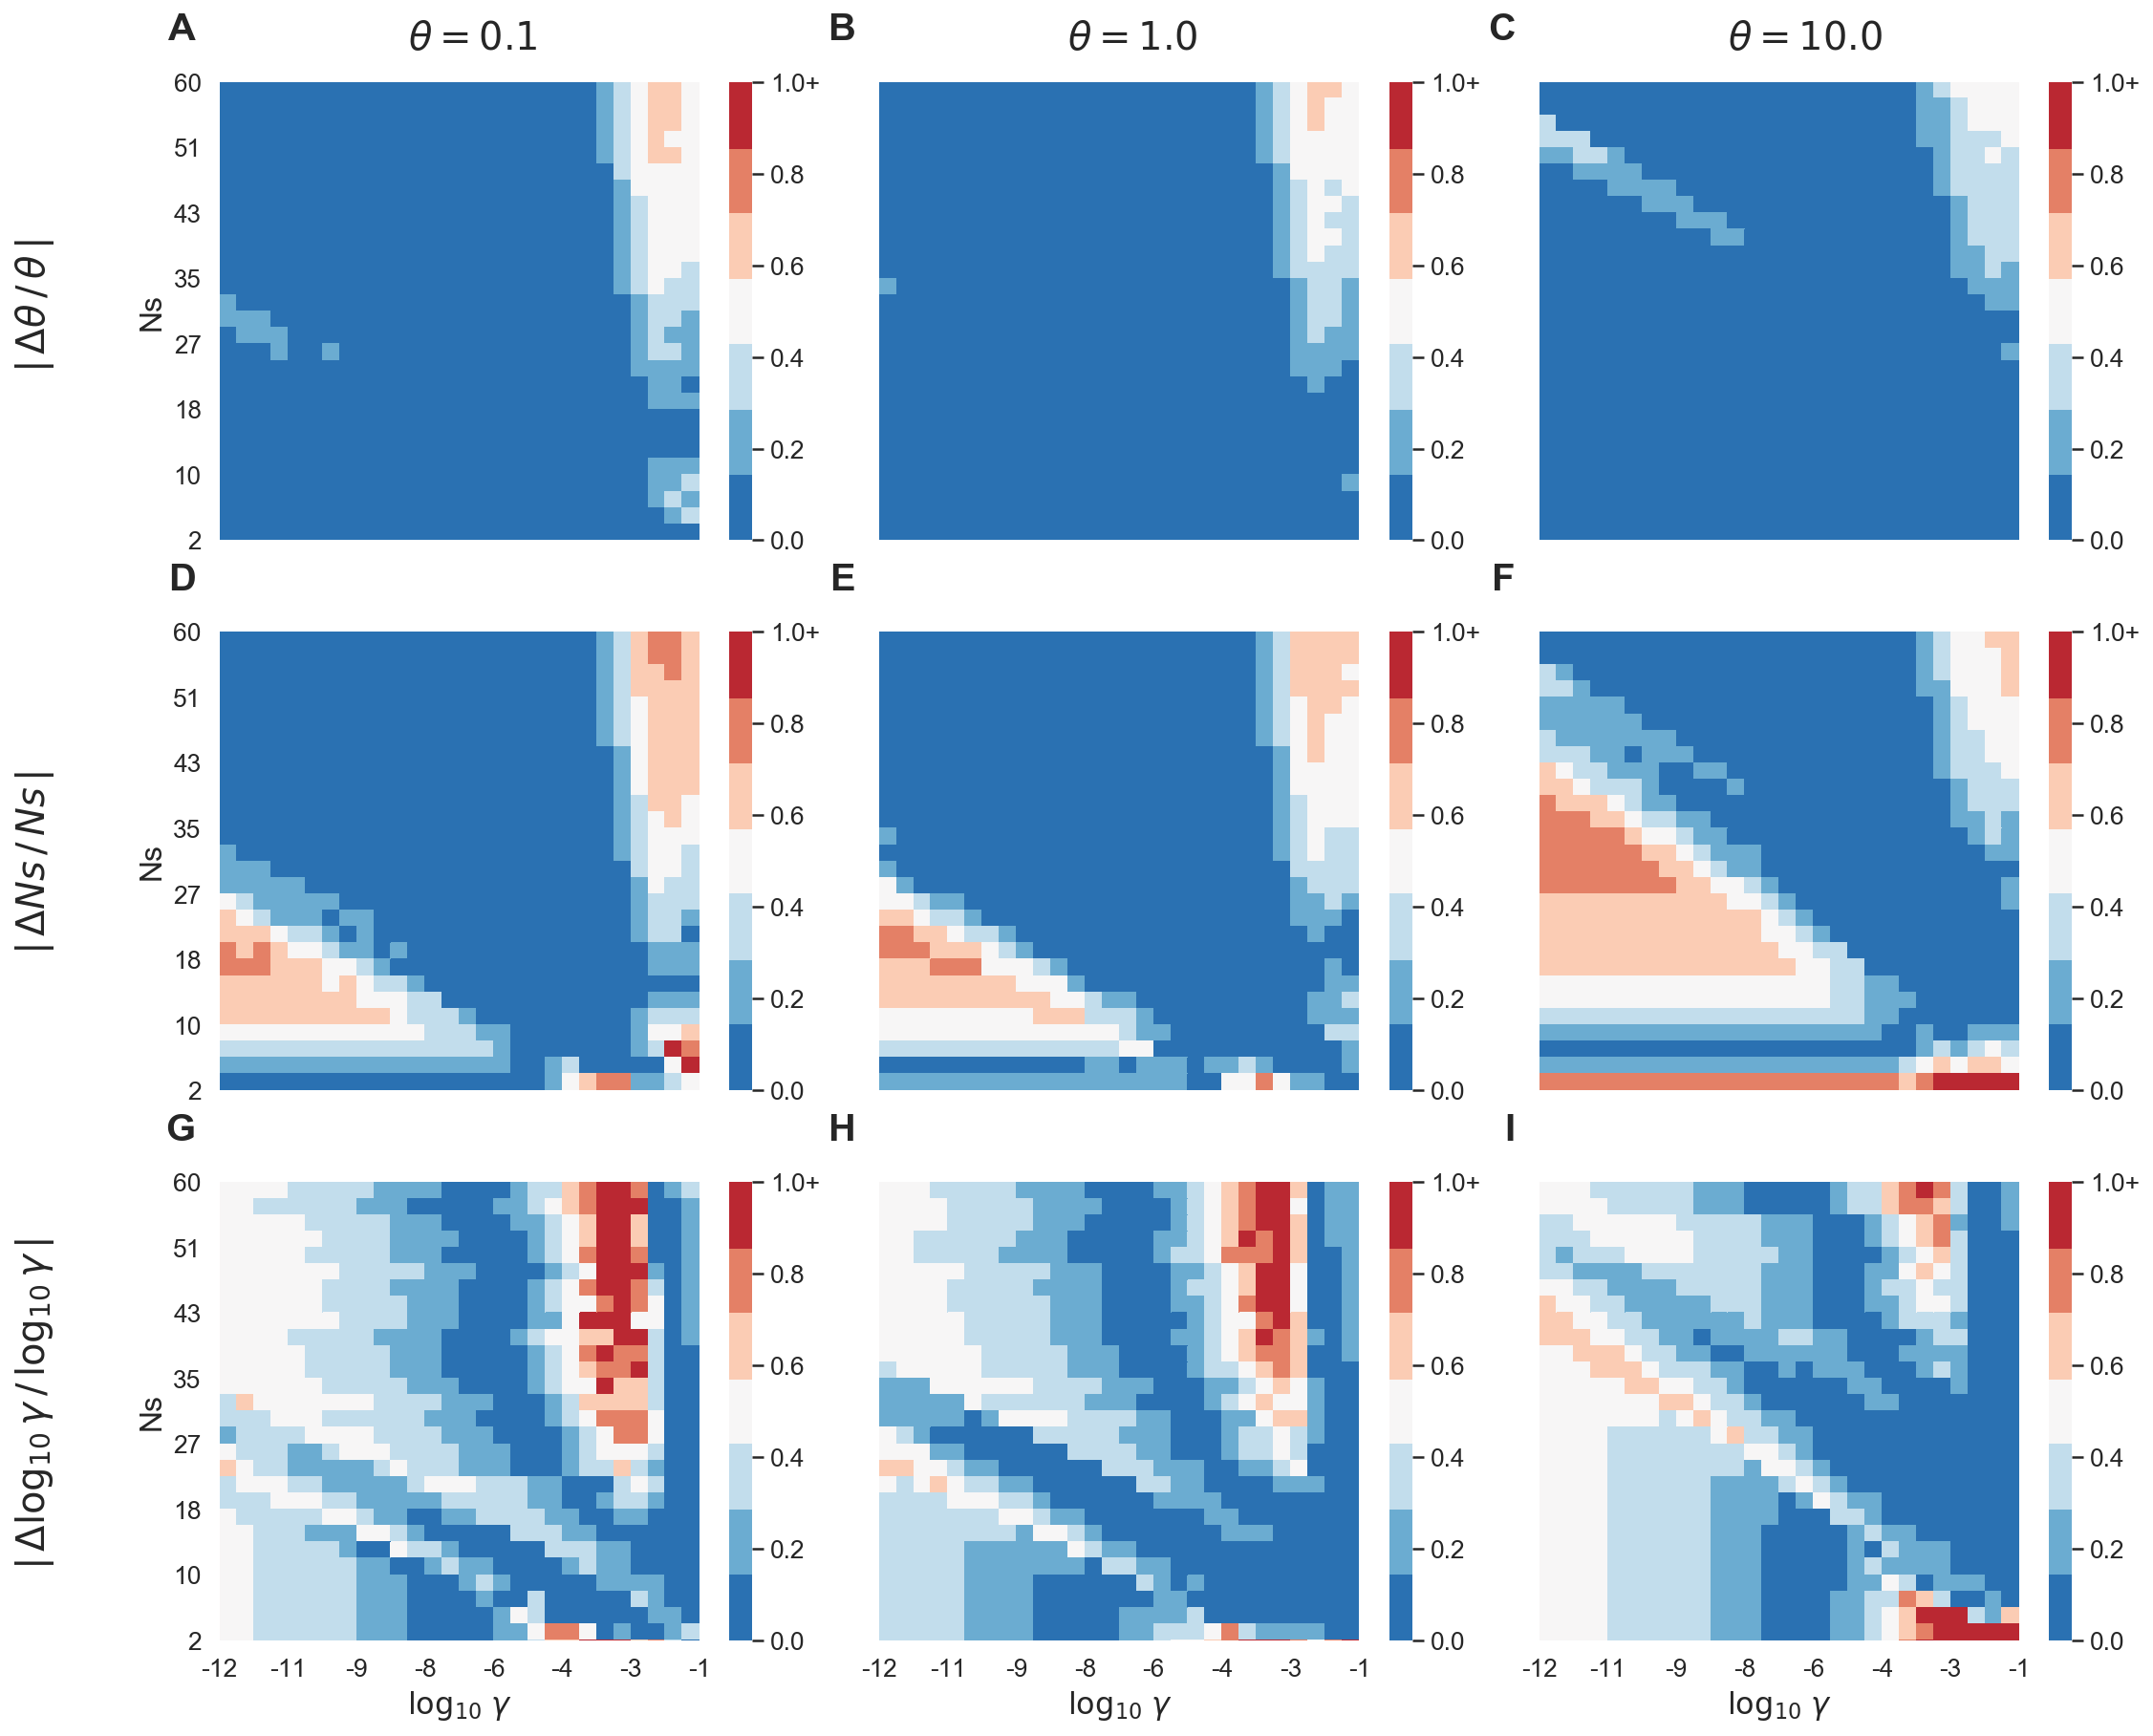

In [31]:
sns.set(font_scale=1.2) # colormap fontsize

x_tick_pos = np.array([ 0,  4,  8, 12, 16, 20, 24, 28])
x_tick_val = [-12, -11, -9, -8, -6, -4, -3, -1]
y_tick_pos = np.array([ 0,  4,  8, 12, 16, 20, 24, 28])
y_tick_val = [60, 51, 43, 35, 27, 18, 10, 2]

kw_label = {
#     'x' : -0.1,
    'x' : -0.05,
    'y' : 1.15,
    'va': 'top',
    'ha': 'right',
    'fontsize'  : 20,
    'fontweight': 'bold', # 'normal', 'bold'
}

kw_row = {
#     'x'       : -12,
#     'y'       : 12,
#     'y'       : 17,
    'rotation': 90,
    'fontsize': 20,
}

kw_col = {
#     'x'       : 10,
    'y'       : -2,
    'rotation': 0,
    'fontsize': 20,
}

# font_size
fs_title = 18
fs_legend = 16
fs_tick = 13

f = plt.figure(figsize=(3*6, 3*5))

def add_heatmap_err(t, arch, i=1):
    df = arch[t].iloc[:, :-2]
    cmap = sns.color_palette("RdBu_r", 7)
    cbar = True
    ax = sns.heatmap(df, xticklabels=1, yticklabels=1, vmin=0, vmax=1, center=0.5, cmap=cmap, cbar=cbar)
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, .2, .4, .6, .8, 1])
    cbar.set_ticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0+'])
    plt.xticks(x_tick_pos, ['' * len(x_tick_val)], rotation=0)
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(y_tick_pos, ['' * len(y_tick_val)])


theta = 0.1

ax = f.add_subplot(331)
add_heatmap_err(theta, theta_arch)
plt.yticks(y_tick_pos, y_tick_val)
plt.ylabel('Ns', fontsize=fs_legend)
ax.tick_params(labelsize=fs_tick)
ax.text(s='A', transform=ax.transAxes, **kw_label)
plt.text(s=r'$\theta = 0.1$', **kw_col, x=11)
plt.text(s=r'$|\, \Delta \theta \, / \,  \theta \, |$', x=-12, y=17, **kw_row)


theta = 1.0

ax2 = f.add_subplot(332)
add_heatmap_err(theta, theta_arch)
ax2.text(s='B', transform=ax2.transAxes, **kw_label)
ax2.tick_params(labelsize=fs_tick)
plt.text(s=r'$\theta = 1.0$', **kw_col, x=11)

theta = 10.0

ax1 = f.add_subplot(333)
add_heatmap_err(theta, theta_arch)
# plt.yticks(y_tick_pos, y_tick_val)
# plt.ylabel('Ns', fontsize=fs_legend)
# plt.xticks(x_tick_pos, x_tick_val, rotation=0)
ax1.text(s='C', transform=ax1.transAxes, **kw_label)
ax1.tick_params(labelsize=fs_tick)
plt.text(s=r'$\theta = 10.0$', **kw_col, x=11)

theta = 0.1

ax1 = f.add_subplot(334)
add_heatmap_err(theta, beta_arch)
plt.yticks(y_tick_pos, y_tick_val)
plt.ylabel('Ns', fontsize=fs_legend)
# ax1.tick_params(labelsize=fs_tick)
# plt.xticks(x_tick_pos, x_tick_val, rotation=0)
ax1.text(s='D', transform=ax1.transAxes, **kw_label)
# plt.text(s=r'$\theta = 0.1$', **kw_col, x=11)
plt.text(s=r'$|\, \Delta Ns \, / \, Ns \,|$', x=-12, y=19, **kw_row)

theta = 1.0

ax2 = f.add_subplot(335)
add_heatmap_err(theta, beta_arch)
# plt.yticks(y_tick_pos, y_tick_val)
# plt.ylabel('Ns', fontsize=fs_legend)
# plt.xticks(x_tick_pos, x_tick_val, rotation=0)
ax2.text(s='E', transform=ax2.transAxes, **kw_label)
ax2.tick_params(labelsize=fs_tick)
# plt.text(s=r'$\theta = 1.0$', **kw_col, x=11)

theta = 10.0

ax3 = f.add_subplot(336)
add_heatmap_err(theta, beta_arch)
# plt.yticks(y_tick_pos, y_tick_val)
# plt.ylabel('Ns', fontsize=fs_legend)
# plt.xticks(x_tick_pos, x_tick_val, rotation=0)
ax3.text(s='F', transform=ax3.transAxes, **kw_label)
ax3.tick_params(labelsize=fs_tick)
# plt.text(s=r'$\theta = 10.0$', **kw_col, x=11)

theta = 0.1

ax1 = f.add_subplot(337)
add_heatmap_err(theta, log_gamma_arch)
plt.yticks(y_tick_pos, y_tick_val)
plt.ylabel('Ns', fontsize=fs_legend)
plt.xticks(x_tick_pos, x_tick_val, rotation=0)
plt.xlabel(r'$\log_{10} \; \gamma$', fontsize=fs_legend)
# ax1.tick_params(labelsize=fs_tick)
# plt.xticks(x_tick_pos, x_tick_val, rotation=0)
ax1.text(s='G', transform=ax1.transAxes, **kw_label)
# plt.text(s=r'$\theta = 0.1$', **kw_col, x=11)
plt.text(s=r'$|\, \Delta \log_{10} \, \gamma \, / \, \log_{10} \, \gamma \, |$',x=-12, y=23, **kw_row)


theta = 1.0

ax2 = f.add_subplot(338)
add_heatmap_err(theta, log_gamma_arch)
# plt.yticks(y_tick_pos, y_tick_val)
# plt.ylabel('Ns', fontsize=fs_legend)
# plt.xticks(x_tick_pos, x_tick_val, rotation=0)
ax2.text(s='H', transform=ax2.transAxes, **kw_label)
ax2.tick_params(labelsize=fs_tick)
plt.xticks(x_tick_pos, x_tick_val, rotation=0)
plt.xlabel(r'$\log_{10} \; \gamma$', fontsize=fs_legend)
# plt.text(s=r'$\theta = 1.0$', **kw_col, x=11)


theta = 10.0

ax3 = f.add_subplot(339)
add_heatmap_err(theta, log_gamma_arch)
# plt.yticks(y_tick_pos, y_tick_val)
# plt.ylabel('Ns', fontsize=fs_legend)
# plt.xticks(x_tick_pos, x_tick_val, rotation=0)
ax3.text(s='I', transform=ax3.transAxes, **kw_label)
ax3.tick_params(labelsize=fs_tick)
plt.xticks(x_tick_pos, x_tick_val, rotation=0)
plt.xlabel(r'$\log_{10} \; \gamma$', fontsize=fs_legend)
# plt.text(s=r'$\theta = 10.0$', **kw_col, x=11)


plt.subplots_adjust(wspace=0.1)
plt.savefig('figures/inference_sim_data{}.pdf'.format(postfix), bbox_inches='tight');
plt.show()

## Neutral

In [45]:
theta_arch_n = {}
beta_arch_n = {}
log_gamma_arch_n = {}

path = '~/Desktop/phd/text/pics_data'

for k in [0.1, 1.0, 10.0]:
    theta_arch_n[k]     = pd.read_csv(os.path.join(path, 'theta_arch_{th:0.1f}_neutral.csv'.format(th=k)),
                                      index_col=0)
    beta_arch_n[k]      = pd.read_csv(os.path.join(path, 'beta_arch_{th:0.1f}_neutral.csv'.format(th=k)),
                                     index_col=0)
    log_gamma_arch_n[k] = pd.read_csv(os.path.join(path, 'log_gamma_arch_{th:0.1f}_neutral.csv'.format(th=k)),
                                     index_col=0)

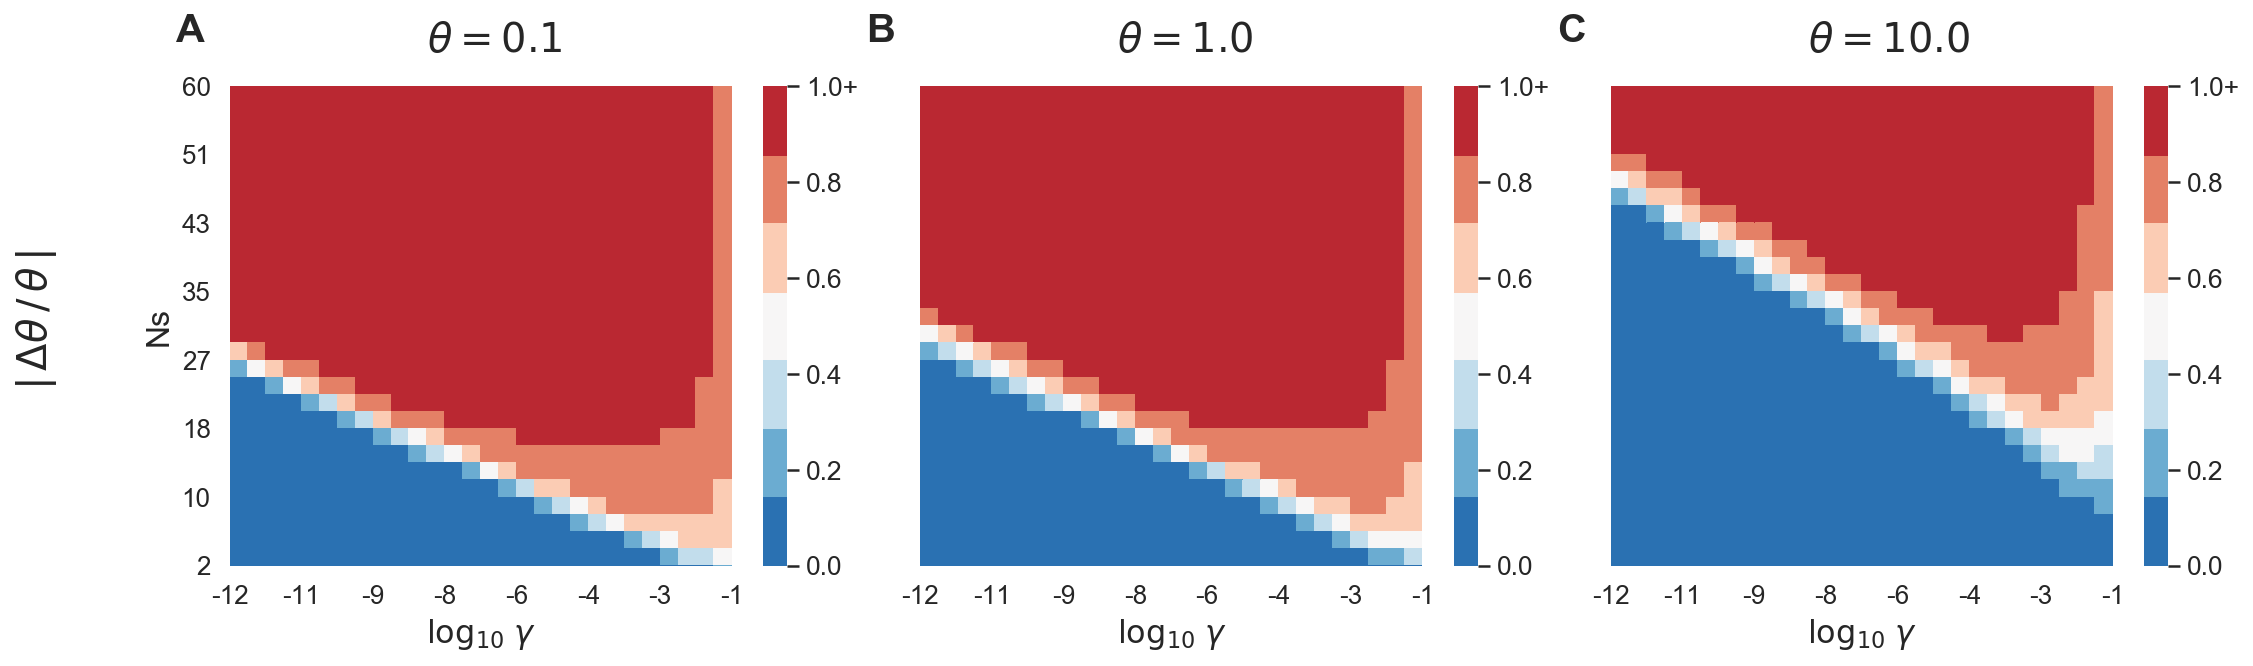

In [46]:
sns.set(font_scale=1.2) # colormap fontsize

x_tick_pos = np.array([ 0,  4,  8, 12, 16, 20, 24, 28])
x_tick_val = [-12, -11, -9, -8, -6, -4, -3, -1]
y_tick_pos = np.array([ 0,  4,  8, 12, 16, 20, 24, 28])
y_tick_val = [60, 51, 43, 35, 27, 18, 10, 2]

kw_label = {
#     'x' : -0.1,
    'x' : -0.05,
    'y' : 1.15,
    'va': 'top',
    'ha': 'right',
    'fontsize'  : 20,
    'fontweight': 'bold', # 'normal', 'bold'
}

kw_row = {
    'x'       : -12,
#     'y'       : 12,
    'y'       : 17,
    'rotation': 90,
    'fontsize': 20,
}

kw_col = {
#     'x'       : 10,
    'y'       : -2,
    'rotation': 0,
    'fontsize': 20,
}

# font_size
fs_title = 18
fs_legend = 16
fs_tick = 13

f = plt.figure(figsize=(3*6, 3*5))

def add_heatmap_err(t, arch, i=1):
    df = arch[t].iloc[:, :-2]
    cmap = sns.color_palette("RdBu_r", 7)
    cbar = True
    ax = sns.heatmap(df, xticklabels=1, yticklabels=1, vmin=0, vmax=1, center=0.5, cmap=cmap, cbar=cbar)
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, .2, .4, .6, .8, 1])
    cbar.set_ticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0+'])
    plt.xticks(x_tick_pos, ['' * len(x_tick_val)], rotation=0)
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(y_tick_pos, ['' * len(y_tick_val)])

    

theta = 0.1

ax = f.add_subplot(331)
add_heatmap_err(theta, theta_arch_n)
plt.yticks(y_tick_pos, y_tick_val)
plt.ylabel('Ns', fontsize=fs_legend)
ax.tick_params(labelsize=fs_tick)
plt.xticks(x_tick_pos, x_tick_val, rotation=0)
plt.xlabel(r'$\log_{10} \; \gamma$', fontsize=fs_legend)
ax.text(s='A', transform=ax.transAxes, **kw_label)
plt.text(s=r'$\theta = 0.1$', **kw_col, x=11)
plt.text(s=r'$|\, \Delta \theta \, / \,  \theta \, |$', **kw_row)



theta = 1.0

ax = f.add_subplot(332)
add_heatmap_err(theta, theta_arch_n)
# plt.yticks(y_tick_pos, y_tick_val)
# plt.ylabel('Ns', fontsize=fs_legend)
plt.xticks(x_tick_pos, x_tick_val, rotation=0)
plt.xlabel(r'$\log_{10} \; \gamma$', fontsize=fs_legend)
ax.text(s='B', transform=ax.transAxes, **kw_label)
ax.tick_params(labelsize=fs_tick)
plt.text(s=r'$\theta = 1.0$', **kw_col, x=11)



theta = 10.0

ax = f.add_subplot(333)
add_heatmap_err(theta, theta_arch_n)
# plt.yticks(y_tick_pos, y_tick_val)
# plt.ylabel('Ns', fontsize=fs_legend)
plt.xticks(x_tick_pos, x_tick_val, rotation=0)
plt.xlabel(r'$\log_{10} \; \gamma$', fontsize=fs_legend)
ax.text(s='C', transform=ax.transAxes, **kw_label)
ax.tick_params(labelsize=fs_tick)
plt.text(s=r'$\theta = 10.0$', **kw_col, x=11)


plt.subplots_adjust(wspace=0.1)
plt.savefig('figures/inference_sim_data{}_n.pdf'.format(postfix), bbox_inches='tight');
plt.show()

# Theta distributions

In [47]:
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
sns.set(font_scale=1.2) # colormap fontsize
plt.style.use('seaborn-whitegrid')
matplotlib.rcParams['xtick.major.size'] = 6.0
matplotlib.rcParams['ytick.major.size'] = 5.0 #0.0

In [48]:
theta_estimate = OrderedDict({
    'Watterson'    : watterson,
    'Tajima'       : tajima,
    'Neutral ABC'    : param_infer_neutral,
    'ABC': param_infer,
})

ch2ax = OrderedDict({
    '2L': (0, slice(0, 2)),
    '2R': (0, slice(2, 4)),
    '3L': (0, slice(4, 6)),
    '3R': (1, slice(1, 3)),
    'X' : (1, slice(3, 5)),
})

letters = list(map(chr, range(65, 91)))[:len(ch2ax)]

In [49]:
font_size = 16
font_size_legend = 14
fs_tick = 11.5

alpha = 0.7

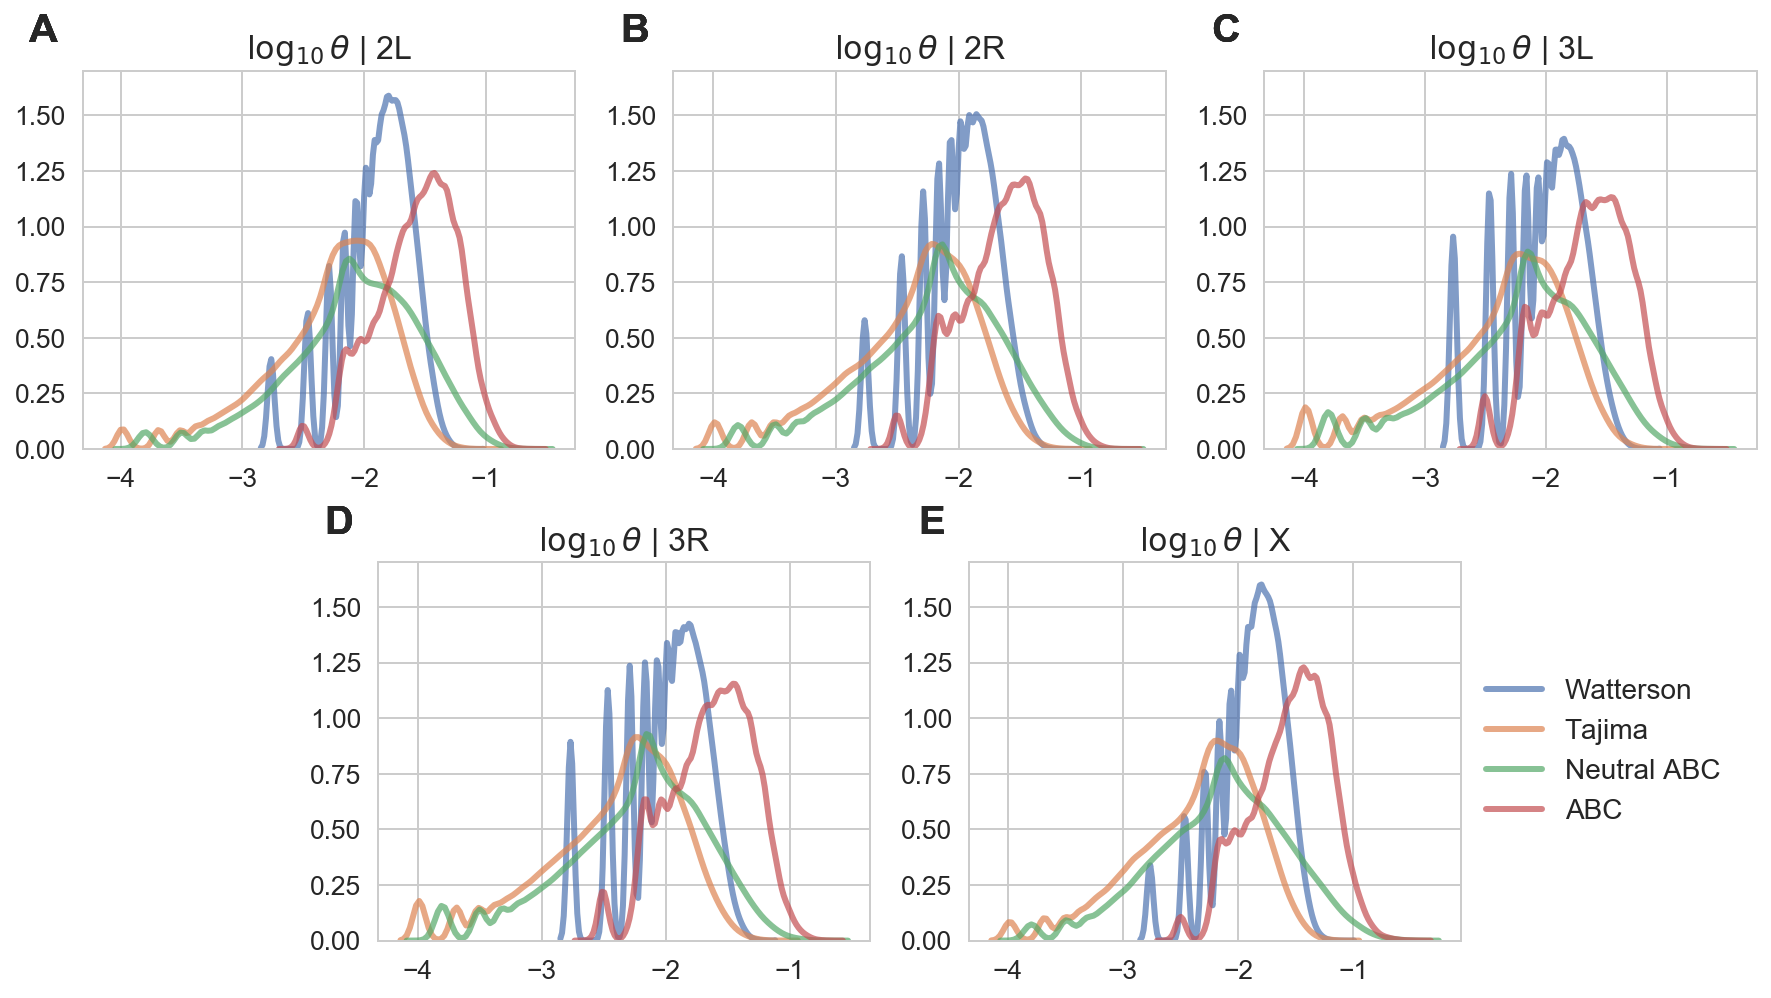

In [50]:
fig = plt.figure(figsize=((6/2) * 5, (4/2) * 4))
grid = plt.GridSpec(2, 6, wspace=0.5, hspace=0.3)

# y_ticks = np.linspace(0, 1.50, 7)
# y_labels = ['{:0.2f}'.format(t) for t in y_ticks]
y_range = [0.0, 1.70]

for ch, coord in ch2ax.items():
    x = fig.add_subplot(grid[coord])
    for name, estimate in theta_estimate.items():
        if 'ABC' in name:
            tmp = np.log10(estimate[ch].theta[estimate[ch].theta > 1e-9])
        else:
            tmp = np.log10(estimate[ch][estimate[ch] > 1e-9])
        sns.kdeplot(tmp, shade=False, label=name, alpha=alpha, ax=x, legend=False, lw=3)
        x.set_title(r'$\log_{10} \, \theta$ | ' + ch, fontsize=font_size)
        x.text(s=letters[ch_list.index(ch)], transform=x.transAxes, **kw_label)
        x.set_ylim(y_range)
#         x.set_yticks(y_ticks, y_labels)
        if ch in ['X']:
            x.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=font_size_legend)
plt.savefig('figures/theta_inference_hist-v2.pdf', bbox_inches='tight');

## Theta along chromosome

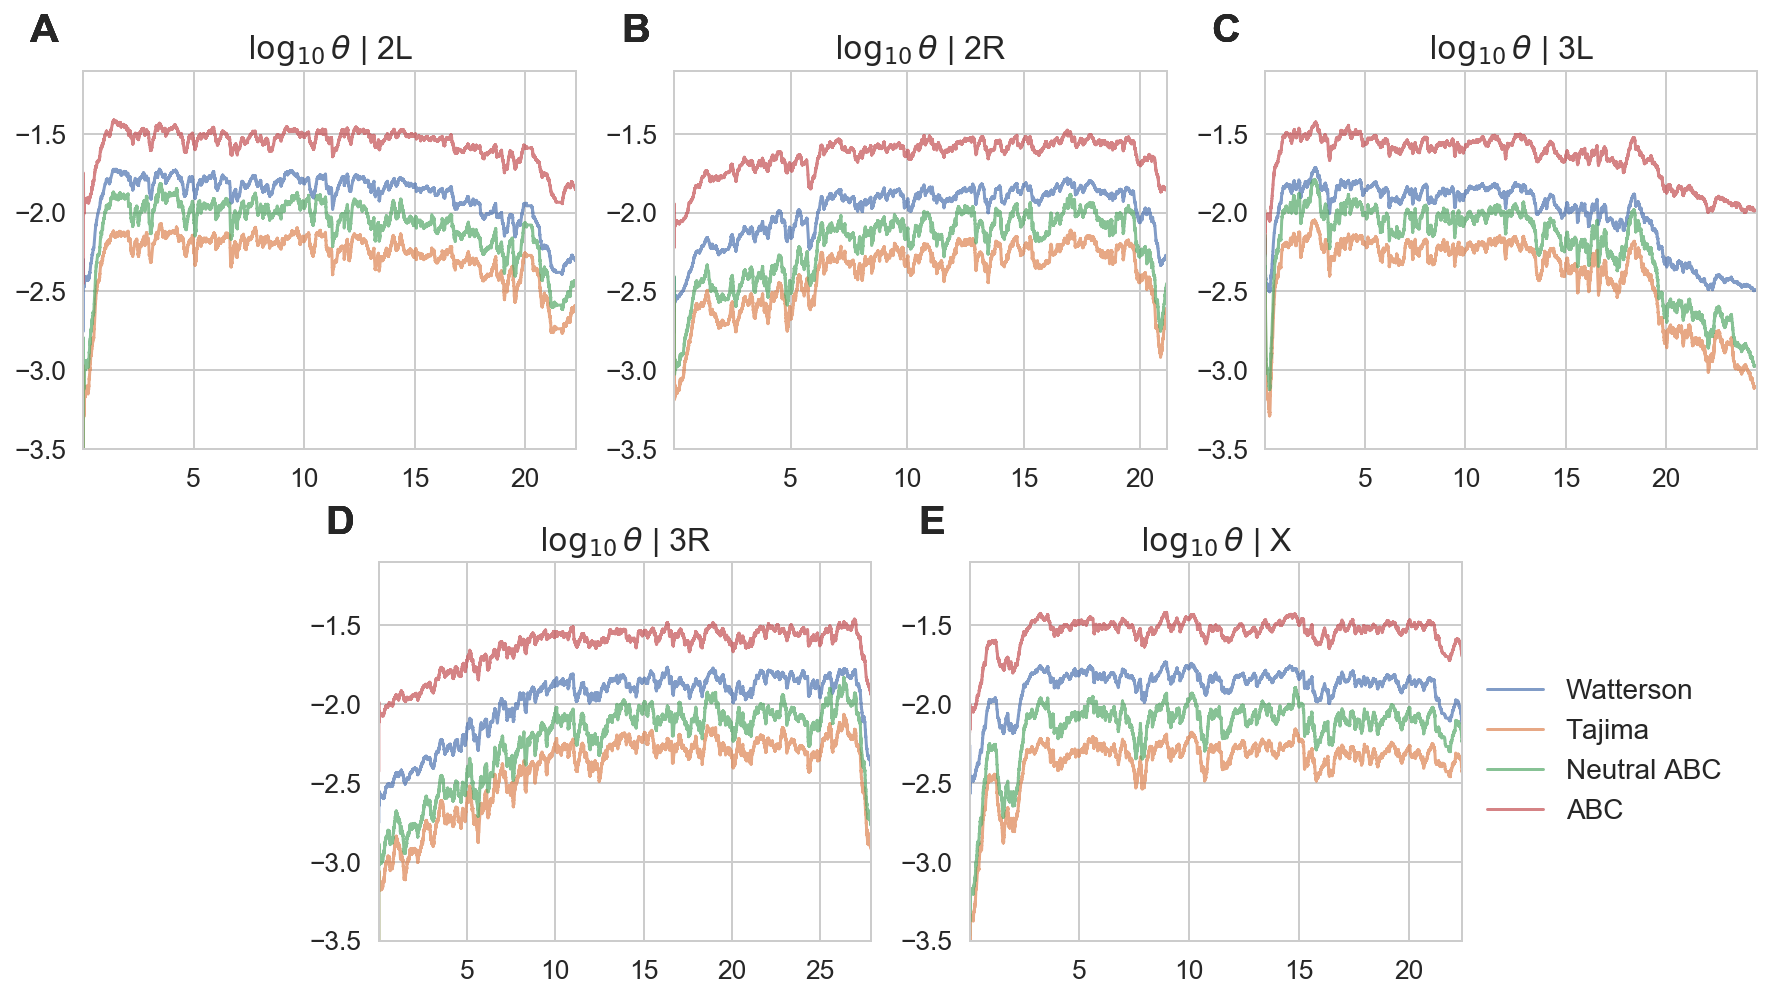

In [51]:
fig = plt.figure(figsize=((6/2) * 5, (4/2) * 4))
grid = plt.GridSpec(2, 6, wspace=0.5, hspace=0.3)

y_range = [-3.5, -1.1]
x_range = [0, 30]

com = 1000
for ch, coord in ch2ax.items():
    x = fig.add_subplot(grid[coord])
    for name, estimate in theta_estimate.items():
        if 'ABC' in name:
            tmp = np.log10(estimate[ch].theta[estimate[ch].theta > 1e-9])
        else:
            tmp = np.log10(estimate[ch][estimate[ch] > 1e-9])
        tmp.index = tmp.index * 100 * 1e-6
        tmp.ewm(com=com).mean().plot(label=name, alpha=alpha)
        x.set_title(r'$\log_{10} \, \theta$ | ' + ch, fontsize=font_size)
        x.text(s=letters[ch_list.index(ch)], transform=x.transAxes, **kw_label)
        x.set_ylim(y_range)
#         x.set_xlim(x_range)
        if ch in ['X']:
            x.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=font_size_legend)
plt.savefig('figures/theta_inference-v2.pdf', bbox_inches='tight');

## Ns along chromosome

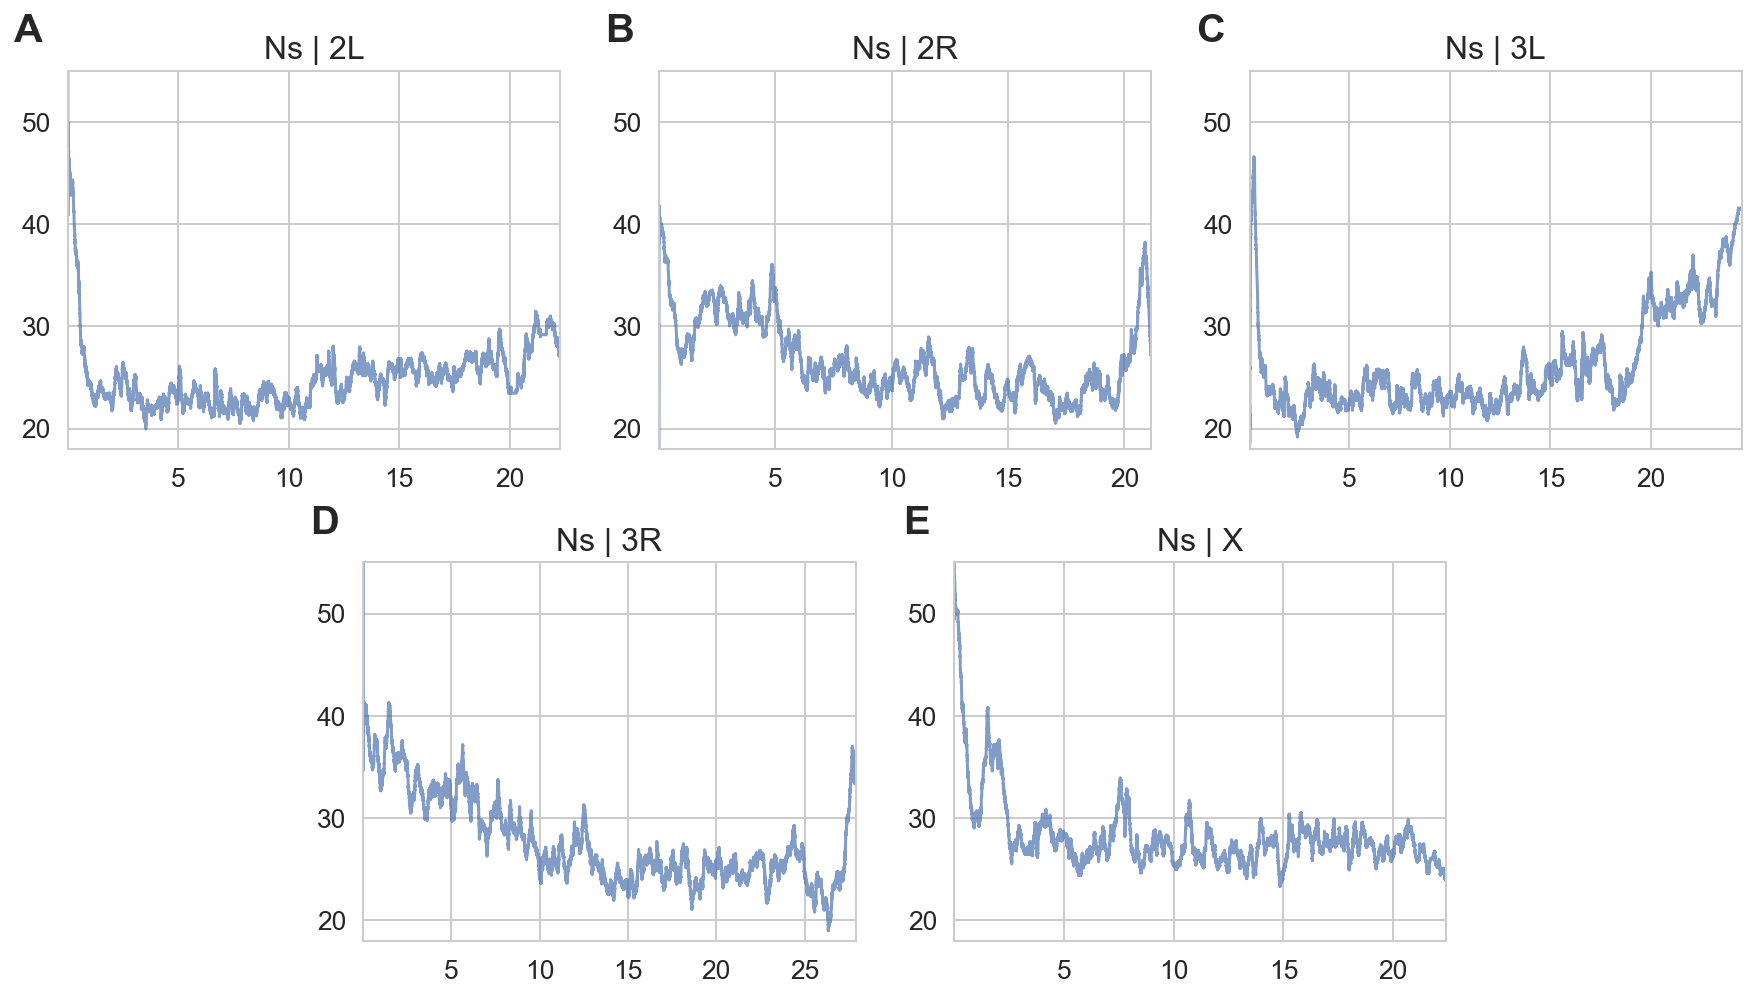

In [52]:
fig = plt.figure(figsize=((6/2) * 5, (4/2) * 4))
grid = plt.GridSpec(2, 6, wspace=0.5, hspace=0.3)

y_range = [18, 55]
x_range = [0, 30]

com = 1000
with sns.axes_style("whitegrid"):
    for ch, coord in ch2ax.items():
        x = fig.add_subplot(grid[coord])
        tmp = param_infer[ch].beta.copy()
        tmp.index = tmp.index * 100 * 1e-6
        tmp.ewm(com=com).mean().plot(alpha=alpha)
        x.set_title(r'Ns | ' + ch, fontsize=font_size)
        x.text(s=letters[ch_list.index(ch)], transform=x.transAxes, **kw_label)
        x.set_ylim(y_range)
    #     x.set_xlim(x_range)
    plt.savefig('figures/beta_inference-v2.pdf', bbox_inches='tight');

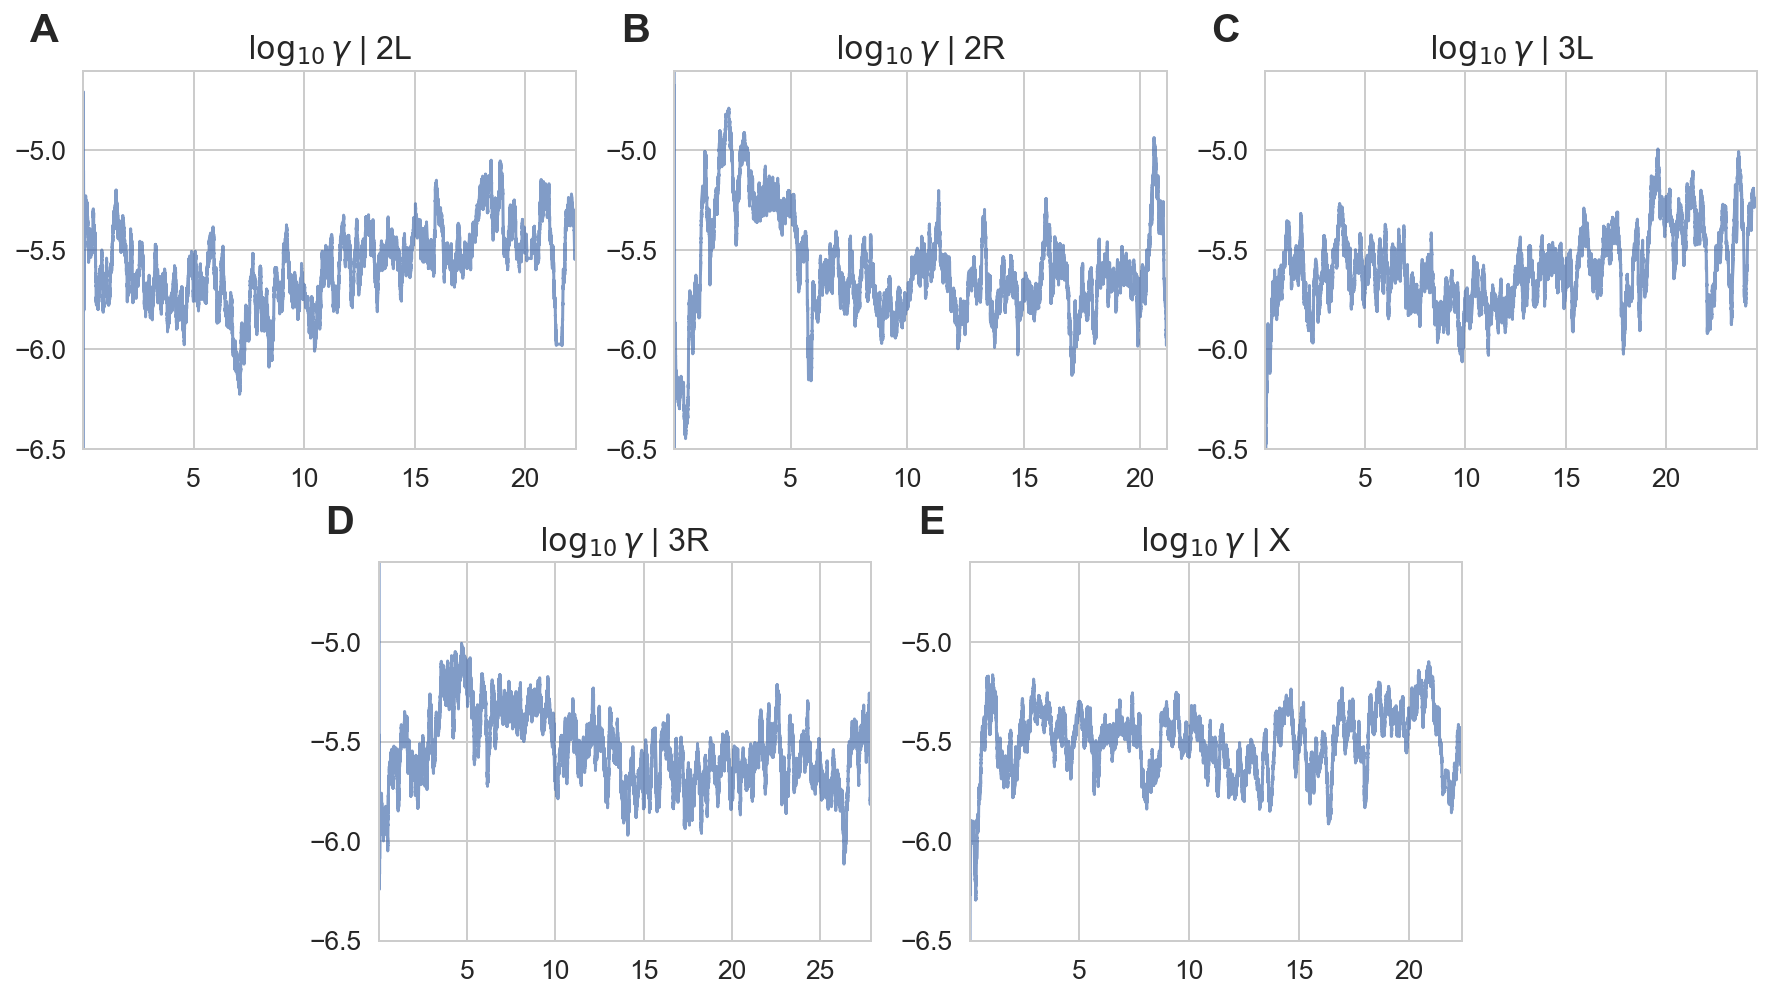

In [53]:
fig = plt.figure(figsize=((6/2) * 5, (4/2) * 4))
grid = plt.GridSpec(2, 6, wspace=0.5, hspace=0.3)

y_range = [-6.5, -4.6]
x_range = [0, 30]

com = 1000

with sns.axes_style("whitegrid"):
    for ch, coord in ch2ax.items():
        x = fig.add_subplot(grid[coord])
        tmp = np.log10(param_infer[ch].gamma).copy()
        tmp.index = tmp.index * 100 * 1e-6
        tmp.ewm(com=com).mean().plot(alpha=alpha)
        x.set_title(r'$\log_{10} \, \gamma$ | ' + ch, fontsize=font_size)
        x.text(s=letters[ch_list.index(ch)], transform=x.transAxes, **kw_label)
        x.set_ylim(y_range)
    #     x.set_xlim(x_range)
    plt.savefig('figures/gamma_inference-v2.pdf', bbox_inches='tight');

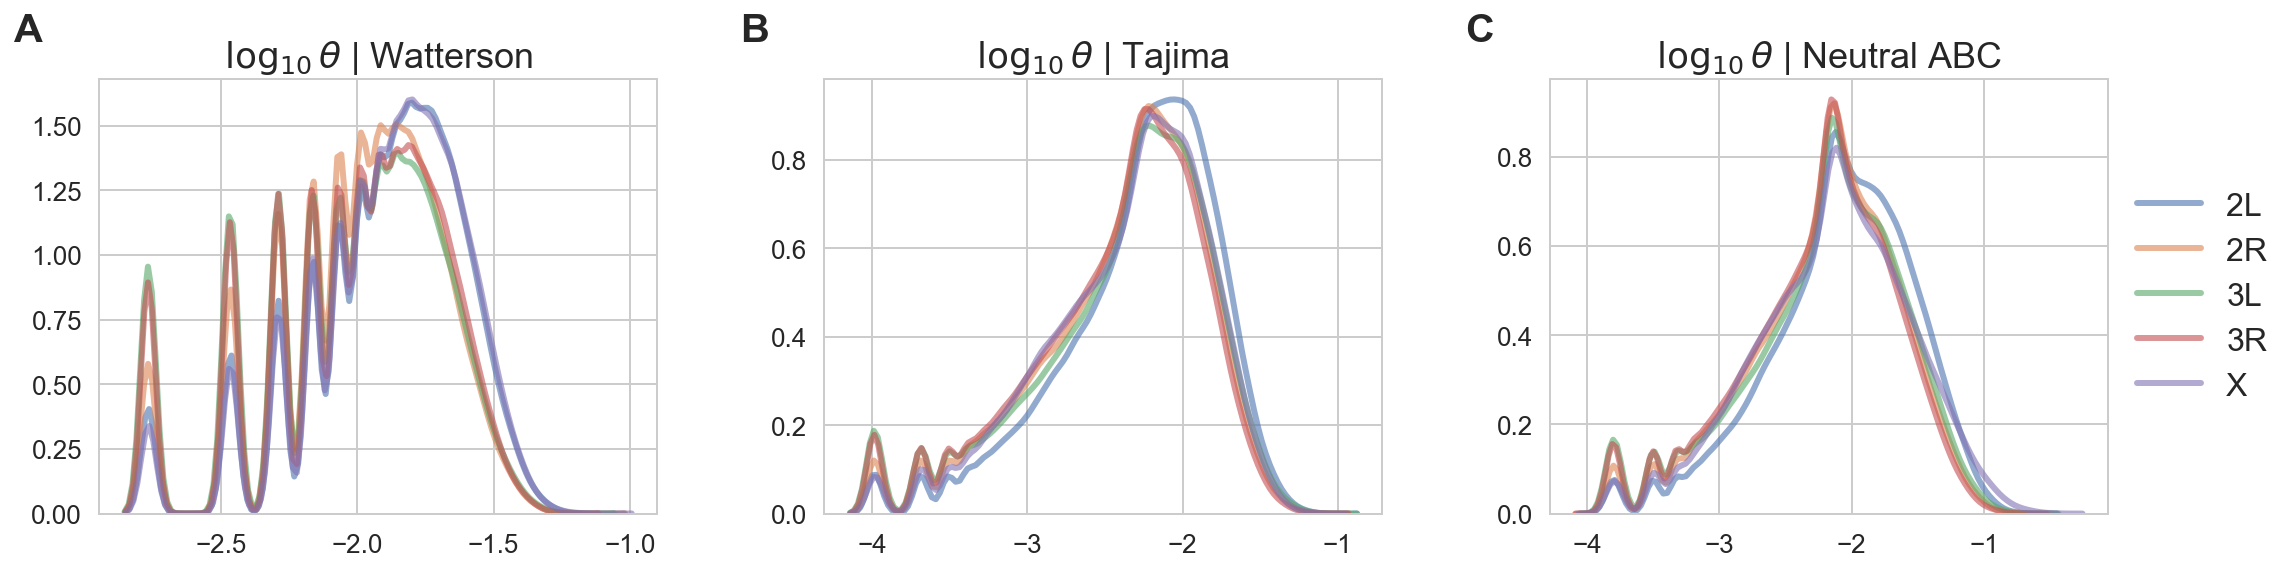

In [54]:
n_col = 3
n_row = 1
fig, ax = plt.subplots(nrows=n_row, ncols=n_col, figsize=(6*n_col, 4*n_row))


kw_label = {
    'x' : -0.1,
    'y' : 1.15,
    'va': 'top',
    'ha': 'right',
    'fontsize'  : 20,
    'fontweight': 'bold', # 'normal', 'bold'
}

kw_plot = {
    'shade' : False,
    'alpha' : 0.6,
    'legend': False,
    'lw': 3,
}

# font_size
fs_title = 18
fs_legend = 16
fs_tick = 13

x = ax[0]
for ch in ch_list:
    tmp = np.log10(watterson[ch][watterson[ch] > 0])
    sns.kdeplot(tmp, label=ch, ax=x, **kw_plot)
x.set_title(r'$\log_{10} \, \theta$ | Watterson', fontsize=fs_title)
x.text(s='A', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

x = ax[1]
for ch in ch_list:
    tmp = np.log10(tajima[ch][tajima[ch] > 0])
    sns.kdeplot(tmp, label=ch, ax=x, **kw_plot)
x.set_title(r'$\log_{10} \, \theta$ | Tajima', fontsize=fs_title)
x.text(s='B', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

x = ax[2]
for ch in ch_list:
    tmp = np.log10(param_infer_neutral[ch].theta)
    sns.kdeplot(tmp, label=ch, ax=x, **kw_plot)
x.set_title(r'$\log_{10} \, \theta$ | Neutral ABC', fontsize=fs_title)
x.text(s='C', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=fs_legend)
plt.subplots_adjust(wspace=0.3)
plt.savefig('figures/theta__hist_compare.pdf', bbox_inches='tight');

# Tajima's D

In [55]:
def get_a1(n):
    return sum([1.0 / i for i in range(1, n)])

def get_a2(n):
    return sum([1.0 / (i * i) for i in range(1, n)])

def get_b1(n):
    return (n + 1) / (3 * (n - 1))

def get_b2(n):
    return (2 * (n * n + n + 3)) / (9 * n * (n - 1))

def get_c1(n):
    return get_b1(n) - 1.0 / get_a1(n)

def get_c2(n):
    return get_b2(n) - (n + 2) / (n * get_a1(n)) + get_a2(n) / (get_a1(n) ** 2)

def get_e1(n):
    return get_c1(n) / get_a1(n)

def get_e2(n):
    return get_c2(n) / (get_a1(n) ** 2 + get_a2(n))

In [56]:
%%time

if load_tajima:
    tajima_d_df = pd.read_csv('tajima_d.csv', **read_df)
    tajima_d = {ch: tajima_d_df[ch].dropna() for ch in ch_list}
else:
    tajima_d = {}
    for ch in ch_list:
        m = mask[ch]
        n = n_non_na[ch][m]
        w = watterson[ch][m]
        t = tajima[ch][m]
        if per_bp:
            w /= per_bp
            t /= per_bp

        a1 = n.apply(get_a1)
        e1 = n.apply(get_e1)
        e2 = n.apply(get_e2)

        S = w * a1

        tajima_d[ch] = (t - w) / np.sqrt(e1 * S + e2 * (S - 1))
    pd.DataFrame(tajima_d).to_csv('tajima_d.csv')

CPU times: user 228 ms, sys: 50.2 ms, total: 278 ms
Wall time: 268 ms


,D > 2,D < -2
2L,0.003985,0.235153
2R,0.004380,0.172653
3L,0.005669,0.145464
3R,0.003014,0.200699
X,0.001675,0.319652


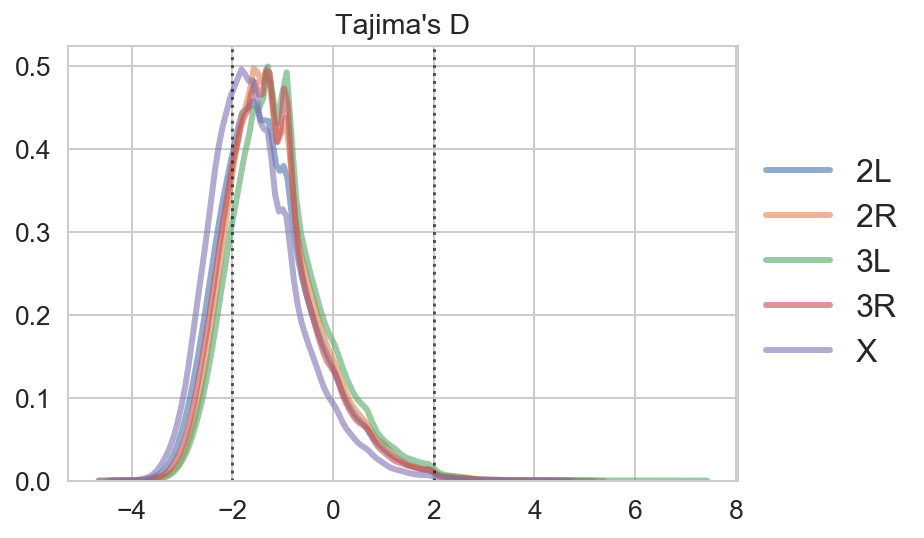

In [57]:
x1 = {}
x2 = {}
for ch in ch_list:
    tmp = tajima_d[ch]

    x1[ch] = (tmp > 2).mean()
    x2[ch] = (tmp < -2).mean()
    
    sns.kdeplot(tmp, label=ch, **kw_plot)
plt.axvline(-2, c='k', linestyle=':', alpha=alpha)
plt.axvline(2, c='k', linestyle=':', alpha=alpha)

df = pd.DataFrame({
    'D > 2' : x1,
    'D < -2': x2,
})

plt.title("Tajima's D")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=fs_legend)
plt.savefig('figures/tajima_d_hist.pdf', bbox_inches='tight');

df

/Users/pasha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/pasha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/pasha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/pasha/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


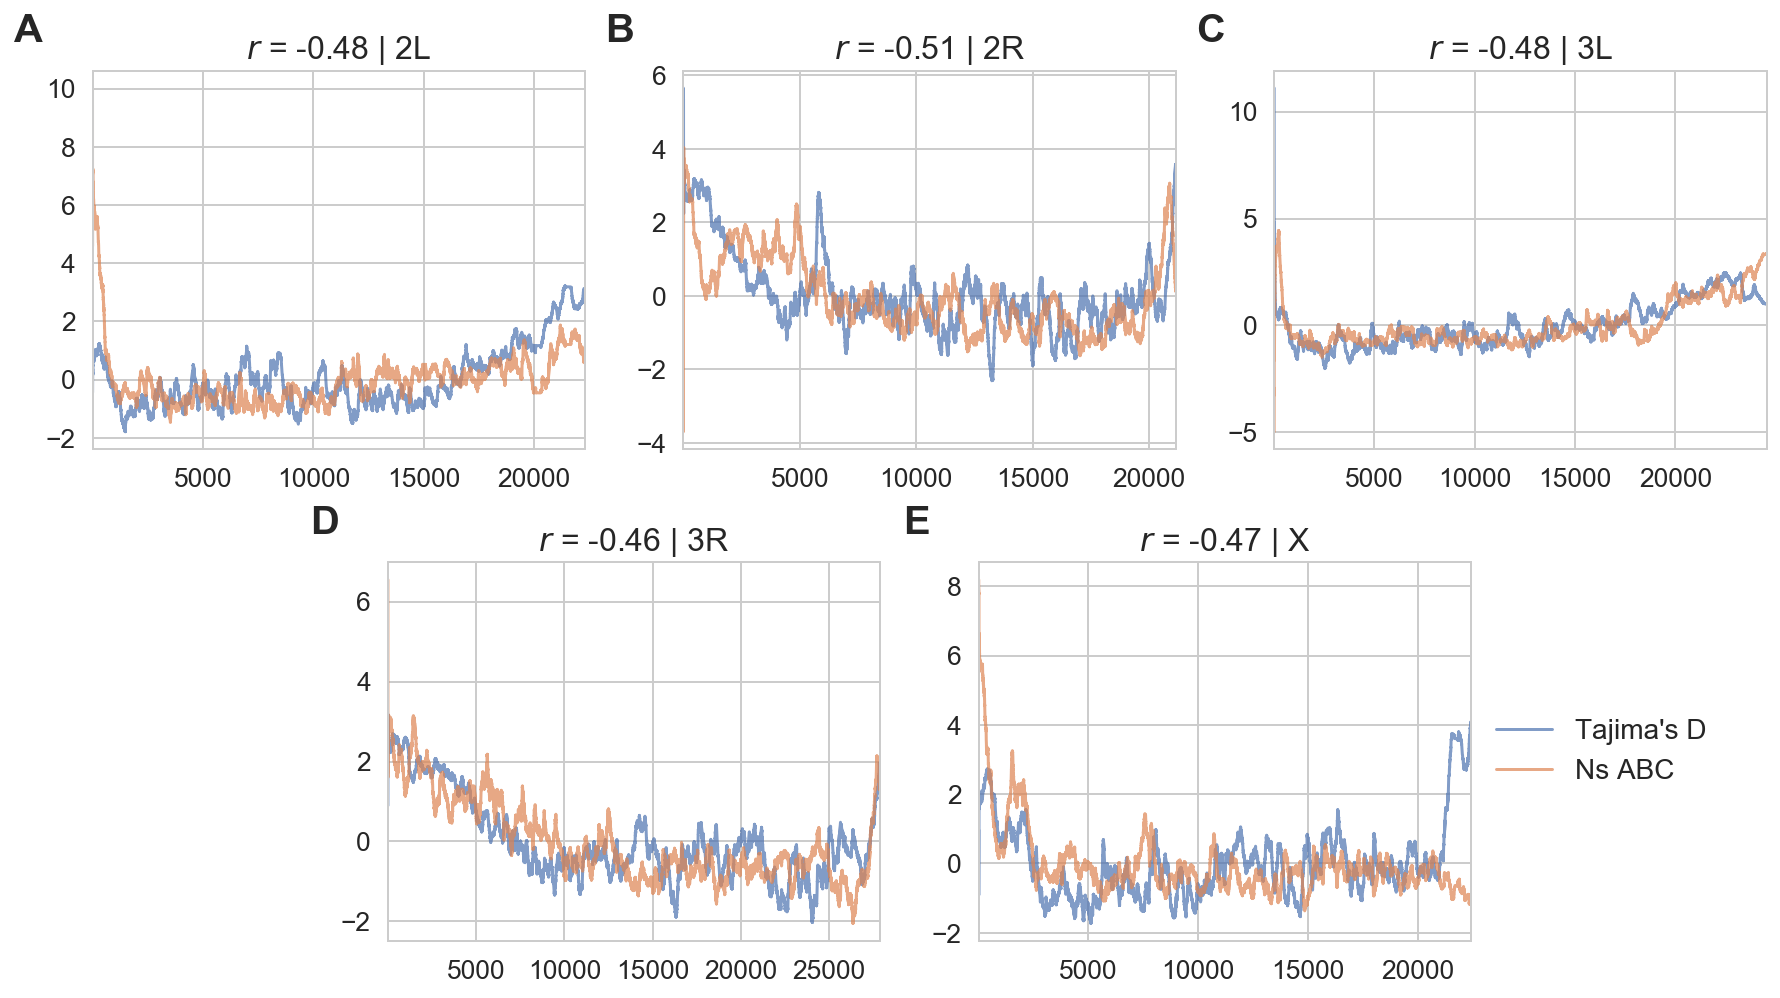

In [58]:
fig = plt.figure(figsize=((6/2) * 5, (4/2) * 4))
grid = plt.GridSpec(2, 6, wspace=0.5, hspace=0.3)

com = 1000
for ch, coord in ch2ax.items():
    x = fig.add_subplot(grid[coord])
    
    df = pd.DataFrame({
        "Tajima's D": tajima_d[ch],
        'Ns ABC' : param_infer[ch].beta,
    })
    df.index = df.index * 100 * 1e-3
    corr = df.corr().iloc[0, 1]
    df = df.ewm(com).mean()
    df = (df - df.mean()) / df.std()

    df.plot(ax=x, alpha=alpha)
    x.legend('')
    x.set_title(r'$r$' + ' = {r:0.2f} | {ch}'.format(ch=ch, r=corr), fontsize=font_size)
    x.text(s=letters[ch_list.index(ch)], transform=x.transAxes, **kw_label)
    if ch in ['X']:
            x.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=font_size_legend)
plt.savefig('figures/tajima_d.pdf', bbox_inches='tight');

# Theta correlation

In [59]:
theta_all = []
for ch in ch_list:
    theta_all.append(pd.DataFrame({
        'Watterson'    : watterson[ch],
        'Tajima'       : tajima[ch],
        'Neutral ABC'    : param_infer_neutral[ch].theta,
        'ABC': param_infer[ch].theta,
    }))
    
theta_all = pd.concat(theta_all, ignore_index=True)
theta_all = theta_all[theta_all > 0]

theta_plot = np.log10(theta_all)

/Users/pasha/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


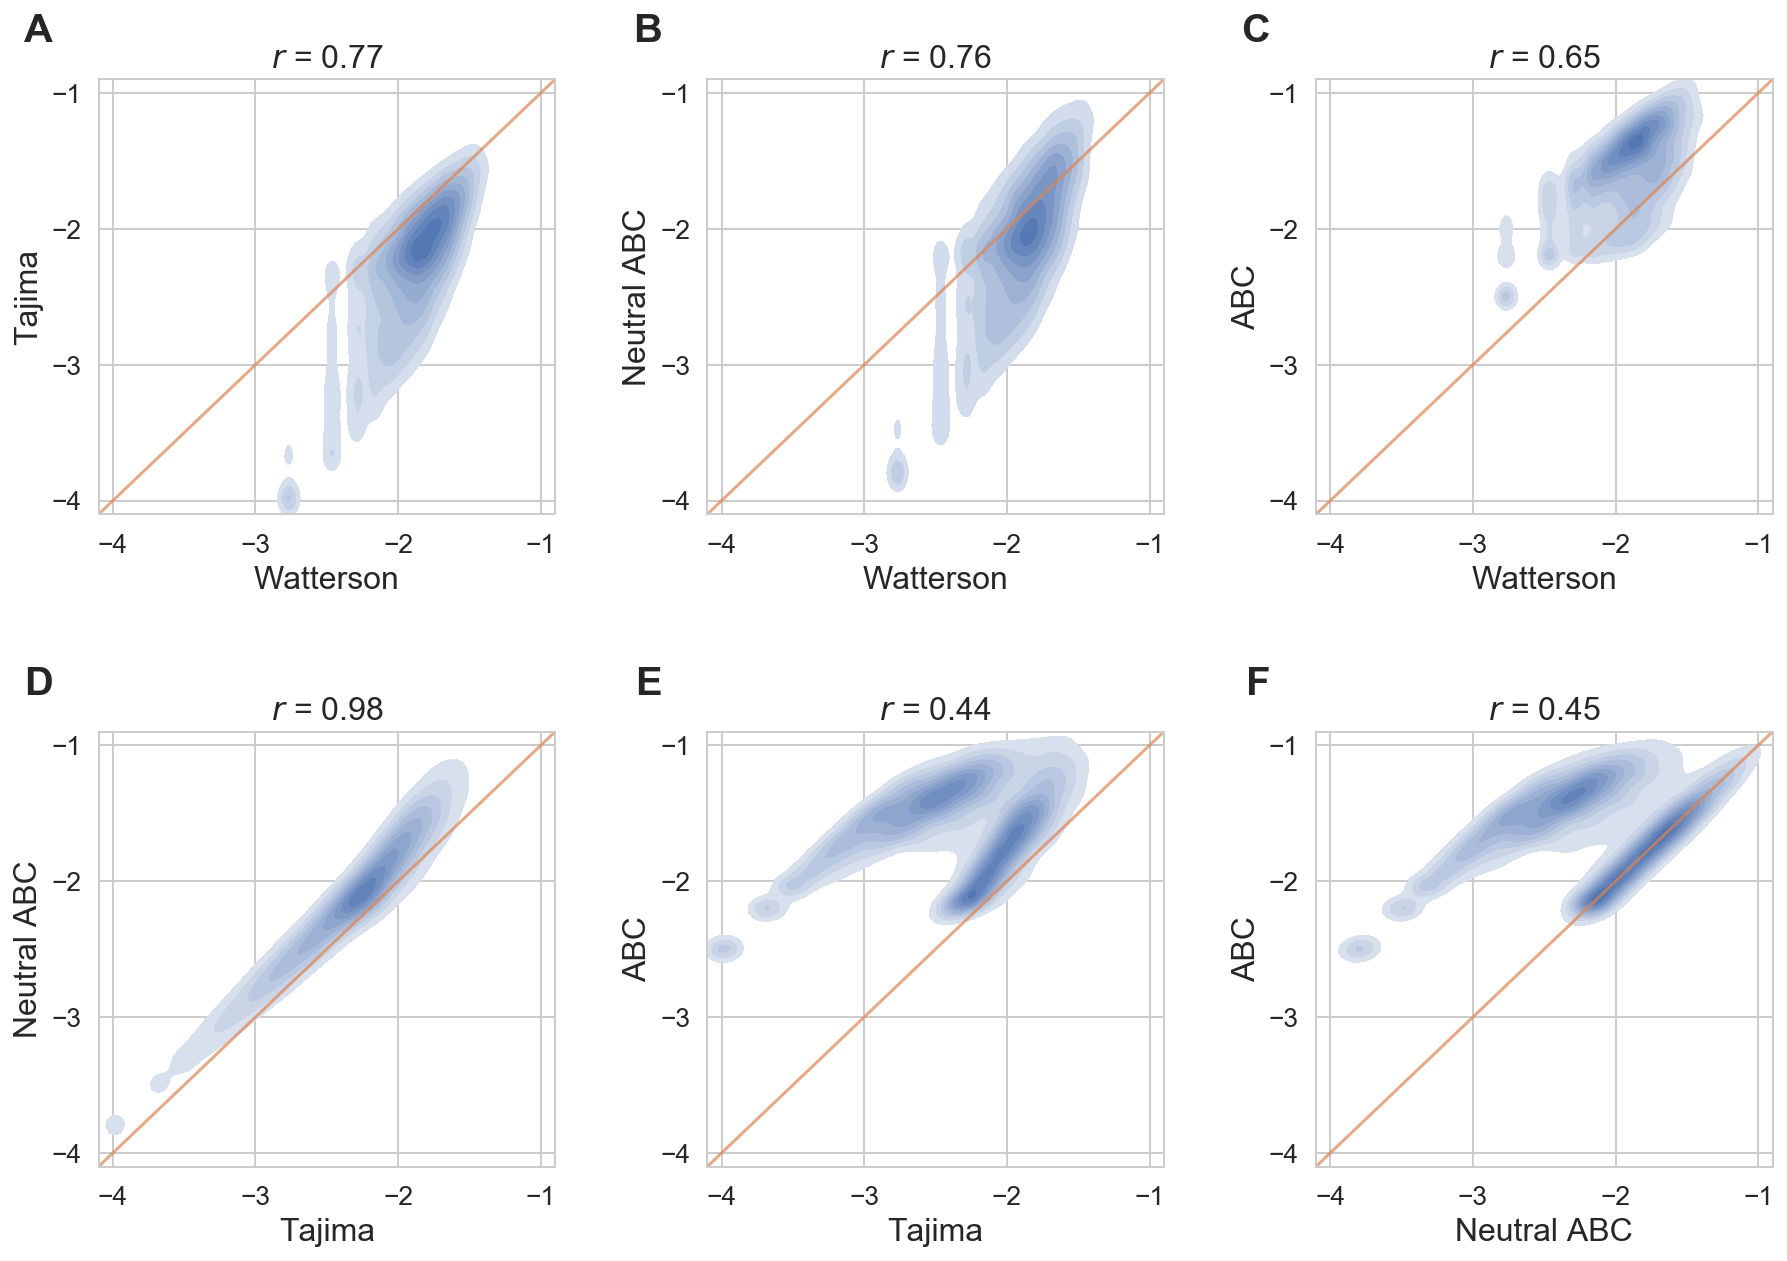

In [60]:
idx = np.random.choice(theta_all.index, size=10000, replace=False)
theta_sampled = theta_plot.loc[idx, :]

letter2info = OrderedDict({
    'A': {'coord': (0, slice(0, 2)), 'val': ['Watterson', 'Tajima']},
    'B': {'coord': (0, slice(2, 4)), 'val': ['Watterson', 'Neutral ABC']},
    'C': {'coord': (0, slice(4, 6)), 'val': ['Watterson', 'ABC']},
    'D': {'coord': (1, slice(0, 2)), 'val': ['Tajima', 'Neutral ABC']},
    'E': {'coord': (1, slice(2, 4)), 'val': ['Tajima', 'ABC']},
    'F': {'coord': (1, slice(4, 6)), 'val': ['Neutral ABC', 'ABC']},
})

fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 6, wspace=1, hspace=0.5)

xy_range = [-4.1, -0.9]
xy_ticks = np.linspace(-4, -1, 4)  # 4 or 7

for letter, v in letter2info.items():
    coord = v['coord']
    val = v['val']
    x = fig.add_subplot(grid[coord])
    
    df = theta_sampled[val]
    corr = df.corr().iloc[0, 1]

    x.set_xlim(xy_range)
    x.set_ylim(xy_range)
    x.set_xticks(xy_ticks)
    x.set_yticks(xy_ticks)
    
    sns.kdeplot(data=df, shade=True, shade_lowest=False, gridsize=100, ax=x)
    plt.xlabel(val[0], fontsize=fs_legend)
    plt.ylabel(val[1], fontsize=fs_legend)
    
    x1, y1 = [-4.2, -0.8], [-4.2, -0.8]
    plt.plot(x1, y1, marker='o', alpha=alpha)
    
    x.set_title(r'$r$' + ' = {r:0.2f}'.format(r=corr), fontsize=font_size)
    x.text(s=letter, transform=x.transAxes, **kw_label)
plt.savefig('figures/corr_1e4-v2.pdf', bbox_inches='tight');

In [62]:
# idx = np.random.choice(theta_all.index, size=10000, replace=False)
# theta_sampled = theta_all.loc[idx, :]

# letter2info = OrderedDict({
#     'A': {'coord': (0, slice(0, 2)), 'val': ['Watterson', 'Tajima']},
#     'B': {'coord': (0, slice(2, 4)), 'val': ['Watterson', 'Neutral ABC']},
#     'C': {'coord': (0, slice(4, 6)), 'val': ['Watterson', 'ABC']},
#     'D': {'coord': (1, slice(0, 2)), 'val': ['Tajima', 'Neutral ABC']},
#     'E': {'coord': (1, slice(2, 4)), 'val': ['Tajima', 'ABC']},
#     'F': {'coord': (1, slice(4, 6)), 'val': ['Neutral ABC', 'ABC']},
# })

# fig = plt.figure(figsize=(15, 10))
# grid = plt.GridSpec(2, 6, wspace=1, hspace=0.5)

# # xy_range = [-4.1, -0.9]
# # xy_ticks = np.linspace(-4, -1, 4)  # 4 or 7

# for letter, v in letter2info.items():
#     coord = v['coord']
#     val = v['val']
#     x = fig.add_subplot(grid[coord])
    
#     df = theta_sampled[val]
#     corr = df.corr().iloc[0, 1]

# #     x.set_xlim(xy_range)
# #     x.set_ylim(xy_range)
# #     x.set_xticks(xy_ticks)
# #     x.set_yticks(xy_ticks)
    
#     sns.kdeplot(data=df, shade=True, shade_lowest=False, gridsize=100, ax=x)
#     plt.xlabel(val[0], fontsize=fs_legend)
#     plt.ylabel(val[1], fontsize=fs_legend)
    
# #     x1, y1 = [-4.2, -0.8], [-4.2, -0.8]
# #     plt.plot(x1, y1, marker='o', alpha=alpha)
    
#     x.set_title(r'$r$' + ' = {r:0.2f}'.format(r=corr), fontsize=font_size)
#     x.text(s=letter, transform=x.transAxes, **kw_label)
# plt.savefig('figures/corr_1e4-v2.pdf', bbox_inches='tight');

# All parameters for all chromosomes

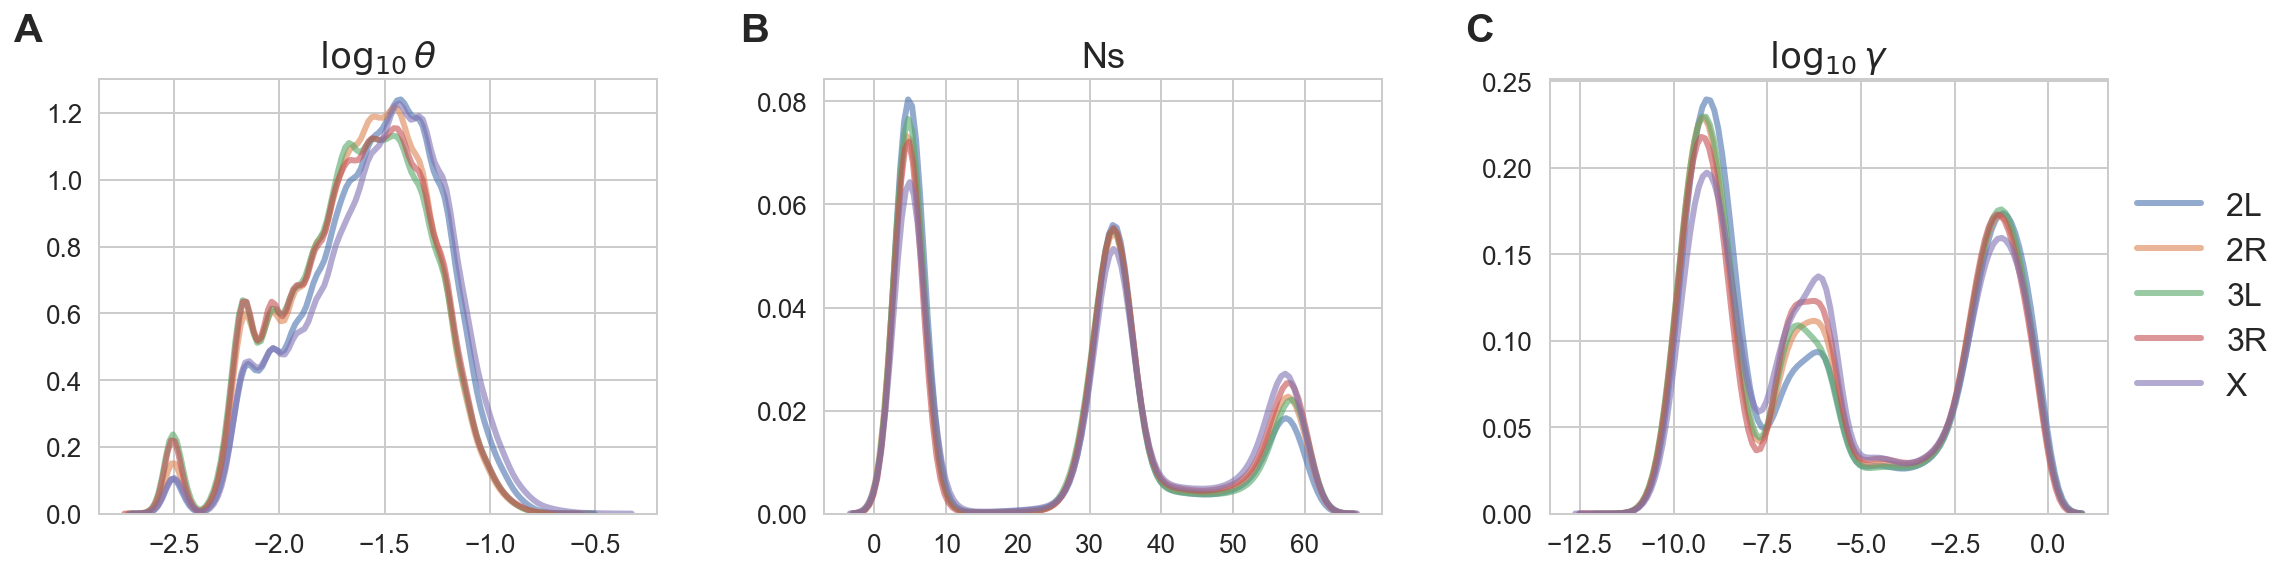

In [81]:
n_col = 3
n_row = 1
fig, ax = plt.subplots(nrows=n_row, ncols=n_col, figsize=(6*n_col, 4*n_row))


kw_label = {
    'x' : -0.1,
    'y' : 1.15,
    'va': 'top',
    'ha': 'right',
    'fontsize'  : 20,
    'fontweight': 'bold', # 'normal', 'bold'
}

kw_plot = {
    'shade' : False,
    'alpha' : 0.6,
    'legend': False,
    'lw': 3,
}

# font_size
fs_title = 18
fs_legend = 16
# fs_tick = 11.5
fs_tick = 13

x = ax[0]
for ch in ch_list:
    tmp = np.log10(param_infer[ch].theta)
#     tmp = tmp[tmp < 3]
    sns.kdeplot(tmp, label=ch, ax=x, **kw_plot)
x.set_title(r'$\log_{10} \, \theta$', fontsize=fs_title)
x.text(s='A', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

x = ax[1]
for ch in ch_list:
    tmp = param_infer[ch].beta
    sns.kdeplot(tmp, label=ch, ax=x, **kw_plot)
x.set_xticks(list(np.array(range(7)) * 10))
x.set_title('Ns', fontsize=fs_title)
x.text(s='B', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

x = ax[2]
for ch in ch_list:
    tmp = np.log10(param_infer[ch].gamma)
    sns.kdeplot(tmp, label=ch, ax=x, **kw_plot)
x.set_title(r'$\log_{10} \, \gamma$', fontsize=fs_title)
x.text(s='C', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=fs_legend)
plt.subplots_adjust(wspace=0.3)
plt.savefig('figures/hist_inferred.pdf', bbox_inches='tight');

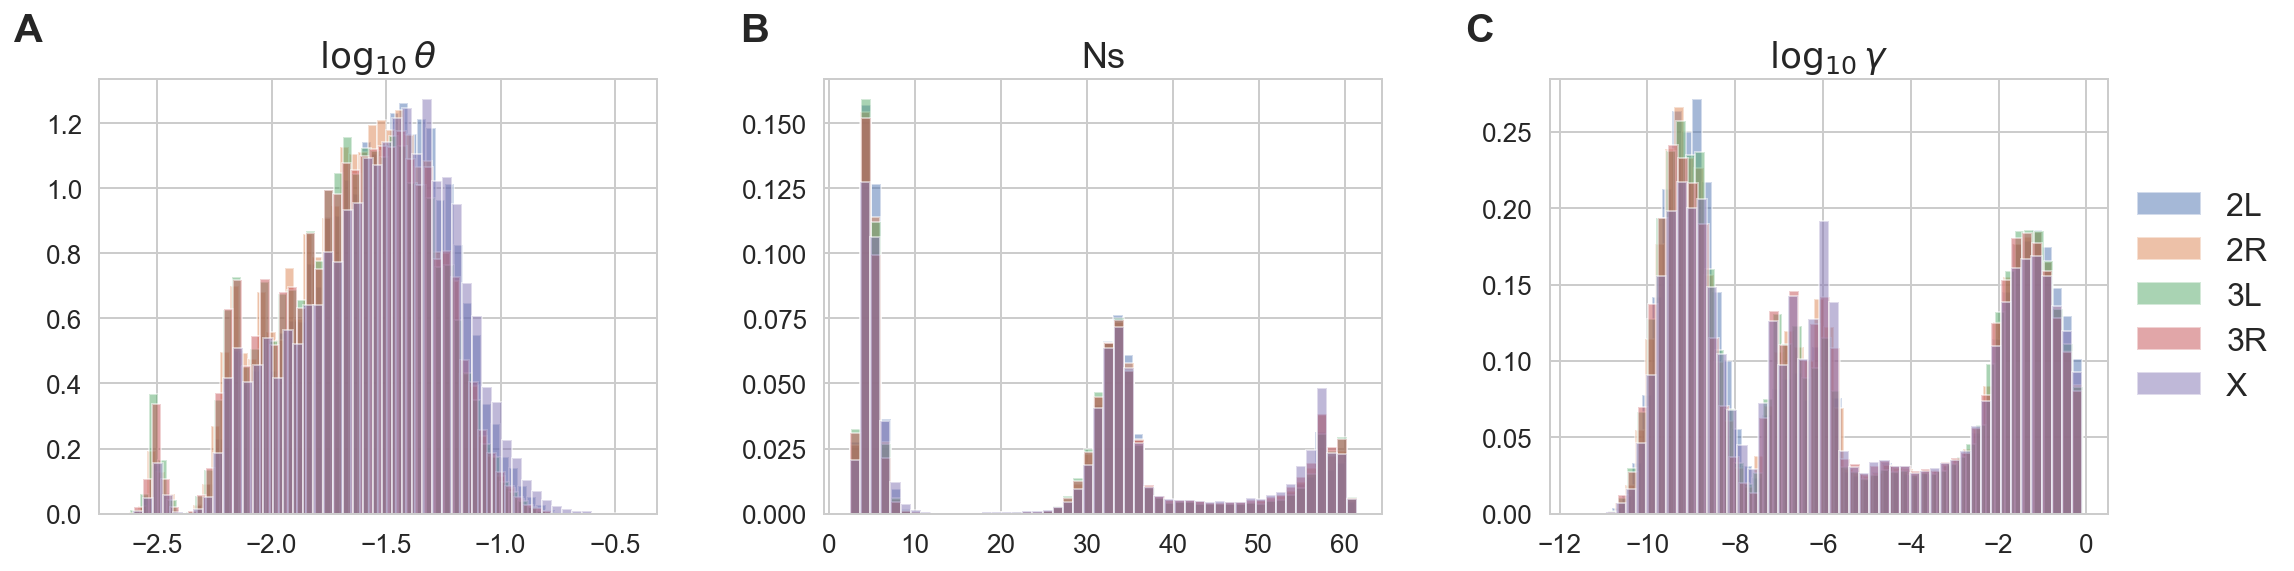

In [70]:
n_col = 3
n_row = 1
fig, ax = plt.subplots(nrows=n_row, ncols=n_col, figsize=(6*n_col, 4*n_row))


kw_label = {
    'x' : -0.1,
    'y' : 1.15,
    'va': 'top',
    'ha': 'right',
    'fontsize'  : 20,
    'fontweight': 'bold', # 'normal', 'bold'
}

kw_plot = {
    'shade' : False,
    'alpha' : 0.6,
    'legend': False,
    'lw': 3,
}

kw_hist = {
    'bins': 50,
    'density': True,
    'alpha': 0.5,
}

# font_size
fs_title = 18
fs_legend = 16
# fs_tick = 11.5
fs_tick = 13

x = ax[0]
for ch in ch_list:
    tmp = np.log10(param_infer[ch].theta)
    tmp.hist(label=ch, ax=x, **kw_hist)
x.set_title(r'$\log_{10} \, \theta$', fontsize=fs_title)
x.text(s='A', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

x = ax[1]
for ch in ch_list:
    tmp = param_infer[ch].beta
    tmp.hist(label=ch, ax=x, **kw_hist)
x.set_xticks(list(np.array(range(7)) * 10))
x.set_title('Ns', fontsize=fs_title)
x.text(s='B', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

x = ax[2]
for ch in ch_list:
    tmp = np.log10(param_infer[ch].gamma)
    tmp.hist(label=ch, ax=x, **kw_hist)
x.set_title(r'$\log_{10} \, \gamma$', fontsize=fs_title)
x.text(s='C', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=fs_legend)
plt.subplots_adjust(wspace=0.3)
# plt.savefig('figures/hist_inferred.pdf', bbox_inches='tight');

In [71]:
x_range = list(np.array(range(7)) * 10)
x_range

[0, 10, 20, 30, 40, 50, 60]

In [72]:
np.array(range(7)) * 10

array([ 0, 10, 20, 30, 40, 50, 60])

In [73]:
ch = '2L'

df = []
for ch in ch_list:
    df.append(pd.DataFrame({
        'Number of valid sequences': n_non_na[ch].loc[mask[ch]],
        'Ns': param_infer[ch].beta
    }))
df = pd.concat(df, ignore_index=True)

In [74]:
df.corr()

,Number of valid sequences,Ns
Number of valid sequences,1.000000,0.073625
Ns,0.073625,1.000000


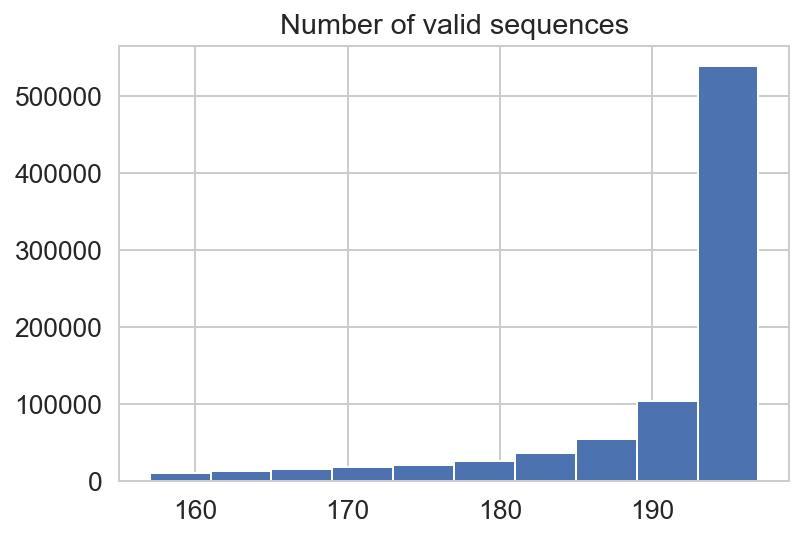

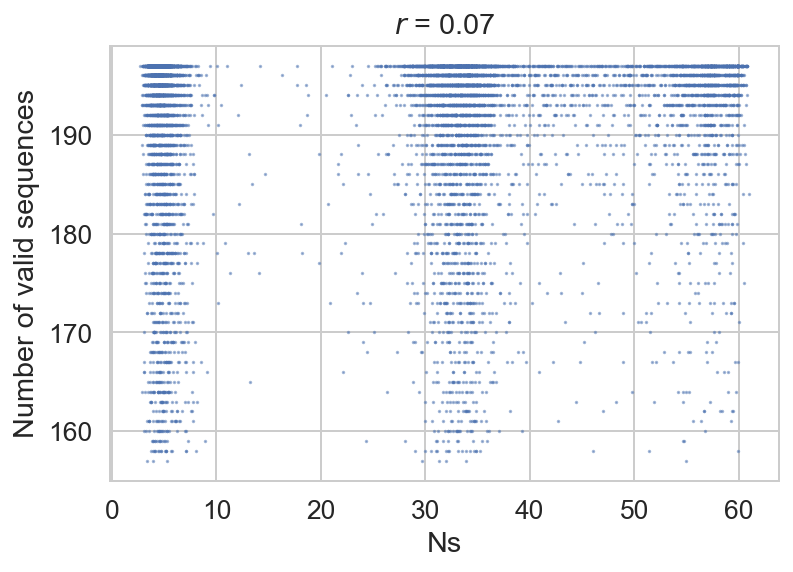

/Users/pasha/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


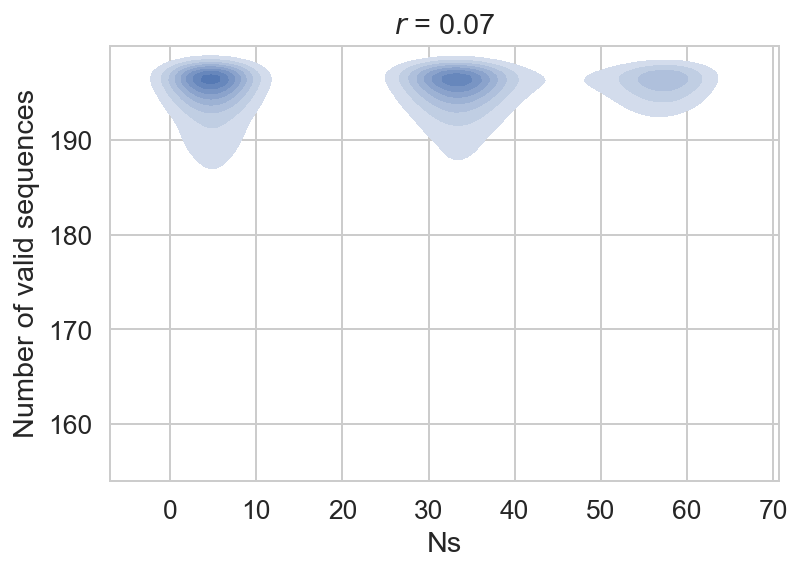

In [75]:
df['Number of valid sequences'].hist()
# (df.n_non_na / df.n_non_na.sum()).hist()
# sns.kdeplot(df.n_non_na, lw=3)
plt.title('Number of valid sequences')
plt.savefig('figures/n_valid_hist.pdf', bbox_inches='tight');
plt.show()


idx = np.random.choice(df.index, size=10000, replace=False)
df_sampled = df.loc[idx, :]

df_sampled.plot.scatter(y='Number of valid sequences', x='Ns', s=0.5, alpha=0.5, c='b')
plt.title(r'$r$' + ' = {:0.2f}'.format(df.corr().iloc[0, 1]))
plt.savefig('figures/n_valid_Ns_scatter.pdf', bbox_inches='tight');
plt.show()

sns.kdeplot(data=df_sampled[['Ns', 'Number of valid sequences']], shade=True, shade_lowest=False, gridsize=100)
plt.ylabel('Number of valid sequences')
plt.xlabel('Ns')
plt.title(r'$r$' + ' = {:0.2f}'.format(df.corr().iloc[0, 1]))
plt.savefig('figures/n_valid_Ns_density.pdf', bbox_inches='tight');
plt.show()

# Peaks

In [76]:
ch = '2L'
Ns = param_infer[ch].beta

peak_1 = param_infer[ch].loc[Ns<15]
peak_2 = param_infer[ch].loc[(Ns>15) & (Ns<45)]
peak_3 = param_infer[ch].loc[Ns>45]

## For a single chromosome

In [77]:
# n_col = 3
# n_row = 1
# fig, ax = plt.subplots(nrows=n_row, ncols=n_col, figsize=(6*n_col, 4*n_row))

# kw_label = {
#     'x' : -0.1,
#     'y' : 1.15,
#     'va': 'top',
#     'ha': 'right',
#     'fontsize'  : 20,
#     'fontweight': 'bold', # 'normal', 'bold'
# }

# kw_plot = {
#     'shade' : False,
#     'alpha' : 0.9,
#     'legend': False,
#     'lw': 3,
# }

# # font_size
# fs_title = 18
# fs_legend = 16
# fs_tick = 13

# x = ax[0]
# sns.kdeplot(np.log10(peak_1.theta), label='Ns ~ 5',  ax=x, **kw_plot)
# sns.kdeplot(np.log10(peak_2.theta), label='Ns ~ 35', ax=x, **kw_plot)
# sns.kdeplot(np.log10(peak_3.theta), label='Ns ~ 55', ax=x, **kw_plot)
# x.set_title(r'$\log_{10} \, \theta$ | '+ ch, fontsize=fs_title)
# x.text(s='A', transform=x.transAxes, **kw_label)
# x.tick_params(labelsize=fs_tick)

# x = ax[1]
# n_bin = 15
# sns.kdeplot(peak_1.beta, label='Ns ~ 5' , ax=x, **kw_plot)
# sns.kdeplot(peak_2.beta, label='Ns ~ 35', ax=x, **kw_plot)
# sns.kdeplot(peak_3.beta, label='Ns ~ 55', ax=x, **kw_plot)
# x.set_title('Ns | ' + ch, fontsize=fs_title)
# x.text(s='B', transform=x.transAxes, **kw_label)
# x.tick_params(labelsize=fs_tick)

# x = ax[2]
# n_bin = 30
# sns.kdeplot(np.log10(peak_1.gamma), label='Peak 1',  ax=x, **kw_plot)
# sns.kdeplot(np.log10(peak_2.gamma), label='Peak 2', ax=x, **kw_plot)
# sns.kdeplot(np.log10(peak_3.gamma), label='Peak 3', ax=x, **kw_plot)
# x.set_title(r'$\log_{10} \, \gamma$ | '+ ch, fontsize=fs_title)
# x.text(s='C', transform=x.transAxes, **kw_label)
# x.tick_params(labelsize=fs_tick)

# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=fs_legend)
# plt.subplots_adjust(wspace=0.3)
# plt.savefig('figures/peaks_{ch}.pdf'.format(ch=ch), bbox_inches='tight');

## For all chromosomes

In [78]:
peaks = {1:{}, 2:{}, 3:{}}

for ch in ch_list:
    Ns = param_infer[ch].beta
    
    peaks[1][ch] = param_infer[ch][Ns<15]
    peaks[2][ch] = param_infer[ch][(Ns>15) & (Ns<45)]
    peaks[3][ch] = param_infer[ch][Ns>45]

peaks_all = {k: pd.concat(v, ignore_index=True) for k, v in peaks.items()}

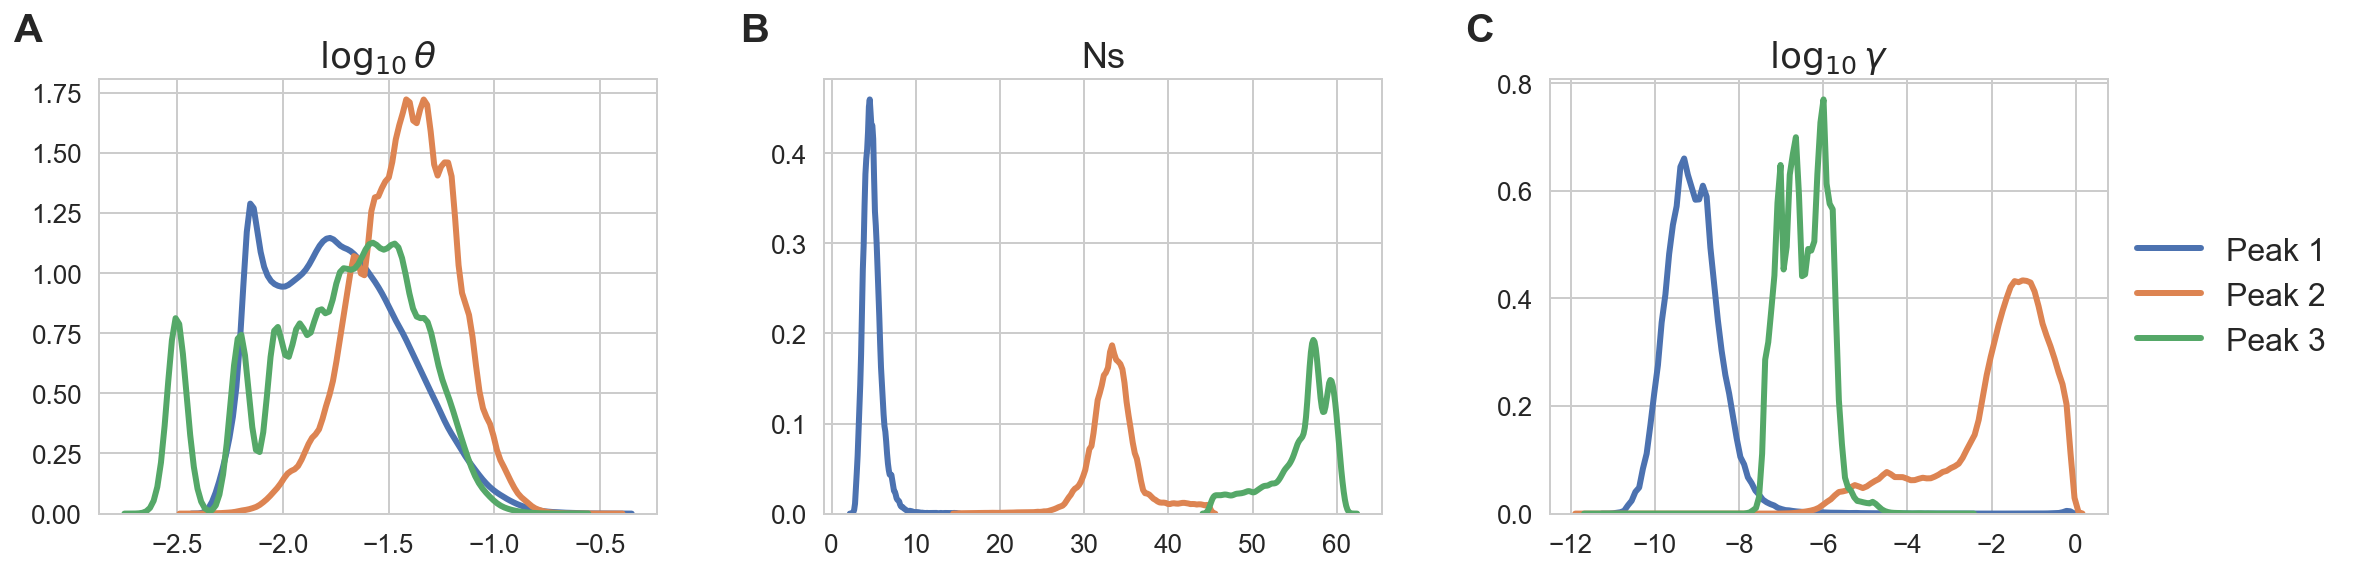

In [79]:
n_col = 3
n_row = 1
fig, ax = plt.subplots(nrows=n_row, ncols=n_col, figsize=(6*n_col, 4*n_row))


kw_label = {
    'x' : -0.1,
    'y' : 1.15,
    'va': 'top',
    'ha': 'right',
    'fontsize'  : 20,
    'fontweight': 'bold', # 'normal', 'bold'
}

kw_plot = {
    'shade' : False,
    'alpha' : 1.0, #0.6,
    'legend': False,
    'lw': 3,
}

# font_size
fs_title = 18
fs_legend = 16
fs_tick = 13

x = ax[0]
for k, v in peaks_all.items():
    tmp = np.log10(v.theta)
    sns.kdeplot(tmp, label=ch, ax=x, **kw_plot)
x.set_title(r'$\log_{10} \, \theta$', fontsize=fs_title)
x.text(s='A', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

x = ax[1]
for k, v in peaks_all.items():
    tmp = v.beta
    sns.kdeplot(tmp, label=ch, ax=x, **kw_plot)
x.set_title('Ns', fontsize=fs_title)
x.text(s='B', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

x = ax[2]
for k, v in peaks_all.items():
    tmp = np.log10(v.gamma)
    sns.kdeplot(tmp, label='Peak {}'.format(k), ax=x, **kw_plot)
x.set_title(r'$\log_{10} \, \gamma$', fontsize=fs_title)
x.text(s='C', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=fs_legend)
plt.subplots_adjust(wspace=0.3)
plt.savefig('figures/peaks_all.pdf', bbox_inches='tight');

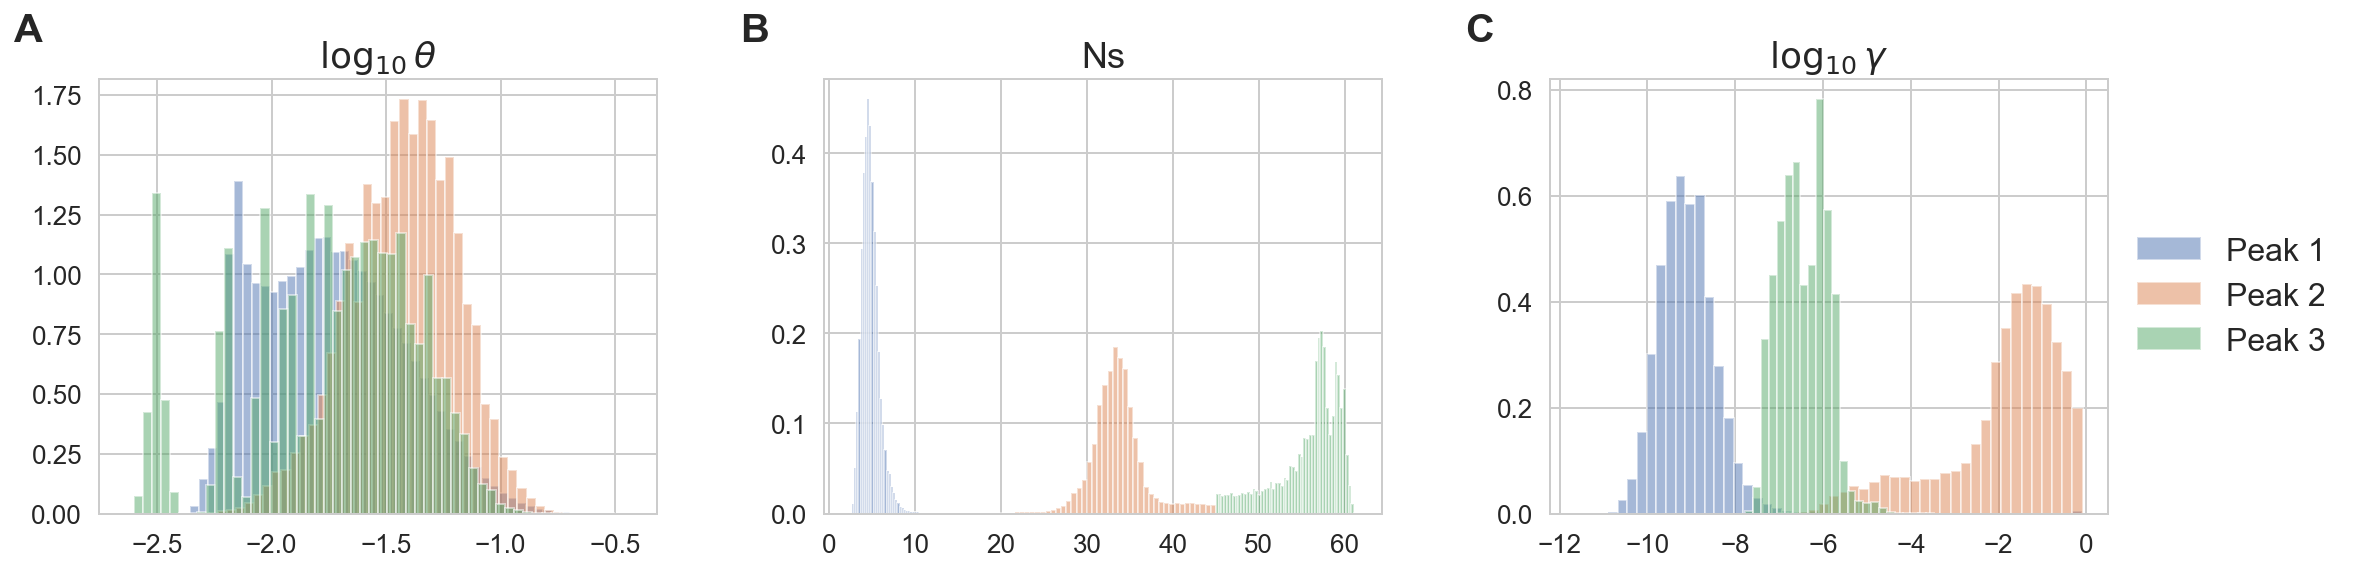

In [80]:
n_col = 3
n_row = 1
fig, ax = plt.subplots(nrows=n_row, ncols=n_col, figsize=(6*n_col, 4*n_row))


kw_label = {
    'x' : -0.1,
    'y' : 1.15,
    'va': 'top',
    'ha': 'right',
    'fontsize'  : 20,
    'fontweight': 'bold', # 'normal', 'bold'
}

kw_plot = {
    'shade' : False,
    'alpha' : 1.0, #0.6,
    'legend': False,
    'lw': 3,
}

# font_size
fs_title = 18
fs_legend = 16
fs_tick = 13

x = ax[0]
for k, v in peaks_all.items():
    tmp = np.log10(v.theta)
    tmp.hist(ax=x, **kw_hist)
x.set_title(r'$\log_{10} \, \theta$', fontsize=fs_title)
x.text(s='A', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

x = ax[1]
for k, v in peaks_all.items():
    tmp = v.beta
    tmp.hist(ax=x, **kw_hist)
x.set_title('Ns', fontsize=fs_title)
x.text(s='B', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

x = ax[2]
for k, v in peaks_all.items():
    tmp = np.log10(v.gamma)
    tmp.hist(label='Peak {}'.format(k), ax=x, **kw_hist)
x.set_title(r'$\log_{10} \, \gamma$', fontsize=fs_title)
x.text(s='C', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=fs_legend)
plt.subplots_adjust(wspace=0.3)
# plt.savefig('figures/peaks_all.pdf', bbox_inches='tight');

# Sequence stats

In [79]:
idxs = {
    1: peak_1.index,
    2: peak_2.index,
    3: peak_3.index,
}
idxs = {k: list(v) for k, v in idxs.items()}

In [80]:
n_mut_all = {}
for p in [1, 2, 3]:
    tmp = []
    for ch in ch_list:
        idxs = {k: list(v[ch].index) for k, v in peaks.items()}
        tmp.append(n_mut_avg[ch].loc[mask[ch]].loc[idxs[p]])
    tmp = pd.concat(tmp, ignore_index=True)
    n_mut_all[p] = tmp

# Overlap with Functional Regions

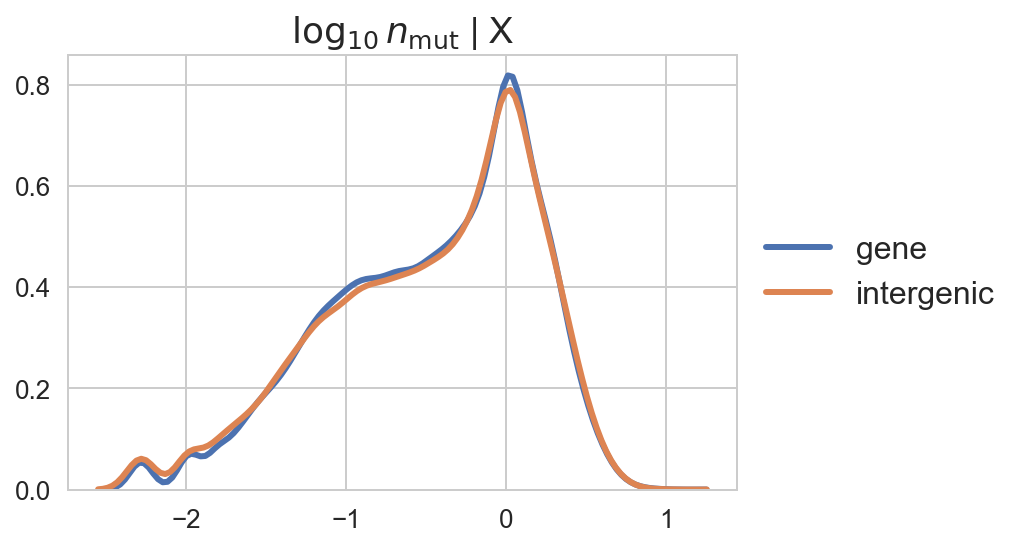

In [81]:
idx = set(overlap[ch]['gene']['full']) & set(mask[ch][mask[ch]].index)
tmp = np.log10(n_mut_avg[ch].loc[idx])
sns.kdeplot(tmp, label='gene', **kw_plot)

idx = set(overlap[ch]['intergenic']['full']) & set(mask[ch][mask[ch]].index)
tmp = np.log10(n_mut_avg[ch].loc[idx])
sns.kdeplot(tmp, label='intergenic', **kw_plot)

plt.tick_params(labelsize=fs_tick)
plt.title(r'$\log_{10} \, n_\mathrm{mut}$ | ' + ch, fontsize=fs_title)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=fs_legend)
plt.savefig('figures/n_mut_functional_{ch}.pdf'.format(ch=ch), bbox_inches='tight');
plt.show()

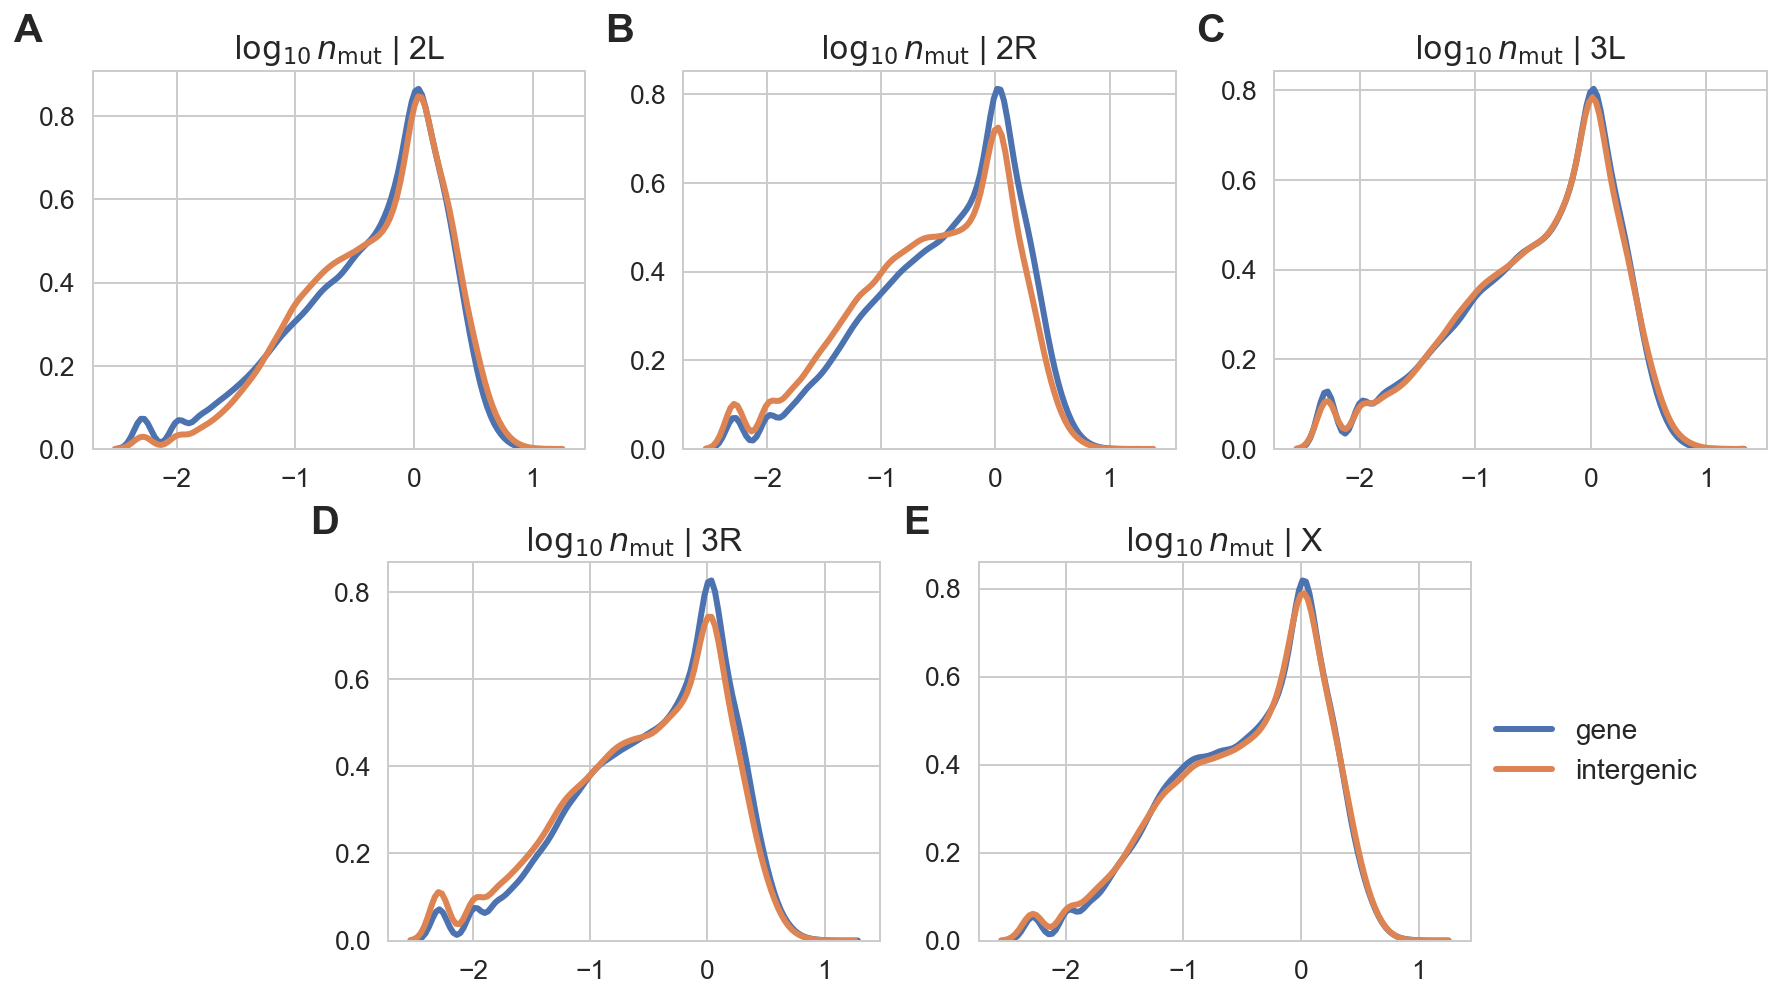

In [82]:
ch2ax = OrderedDict({
    '2L': (0, slice(0, 2)),
    '2R': (0, slice(2, 4)),
    '3L': (0, slice(4, 6)),
    '3R': (1, slice(1, 3)),
    'X' : (1, slice(3, 5)),
})

letters = list(map(chr, range(65, 91)))[:len(ch2ax)]

fig = plt.figure(figsize=((6/2) * 5, (4/2) * 4))
grid = plt.GridSpec(2, 6, wspace=0.5, hspace=0.3)

for ch, coord in ch2ax.items():
    x = fig.add_subplot(grid[coord])
    
    idx = set(overlap[ch]['gene']['full']) & set(mask[ch][mask[ch]].index)
    tmp = np.log10(n_mut_avg[ch].loc[idx])
    sns.kdeplot(tmp, label='gene', ax=x, **kw_plot)
    
#     idx = set(overlap[ch]['intron']['full']) & set(mask[ch][mask[ch]].index)
#     tmp = np.log10(n_mut_avg[ch].loc[idx])
#     sns.kdeplot(tmp, label='intron', ax=x, **kw_plot)
    
    idx = set(overlap[ch]['intergenic']['full']) & set(mask[ch][mask[ch]].index)
    tmp = np.log10(n_mut_avg[ch].loc[idx])
    sns.kdeplot(tmp, label='intergenic', ax=x, **kw_plot)

    x.legend('')
    x.set_title(r'$\log_{10} \, n_\mathrm{mut}$ | ' + '{ch}'.format(ch=ch, r=corr), fontsize=font_size)
    x.text(s=letters[ch_list.index(ch)], transform=x.transAxes, **kw_label)
    if ch in ['X']:
            x.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=font_size_legend)
plt.savefig('figures/n_mut_functional_all.pdf', bbox_inches='tight');

# Histogram

In [83]:
idx1 = param_infer[ch][param_infer[ch].beta < 15].index
idx2 = param_infer[ch][(param_infer[ch].beta > 15) & (param_infer[ch].beta < 45)].index
idx3 = param_infer[ch][param_infer[ch].beta > 45].index

wmask = mask[ch]

idxs = {
    1: list(set(idx1).intersection(set(wmask[wmask].index))),
    2: list(set(idx2).intersection(set(wmask[wmask].index))),
    3: list(set(idx3).intersection(set(wmask[wmask].index))),
}

TODO: Need new hist file

In [84]:
hist_df = []

for k, idx in idxs.items():
#     df = hist.loc[set(idx).intersection(set(mask[ch][mask[ch]].index))]
    df = hist[ch].loc[idx]
    df.columns.name = 'partition'
    df.index.name = 'idx'
    df = df.unstack()
    df.name = 'freq'
    df = pd.DataFrame(df)
    df['peak'] = 'Peak {}'.format(k)
    df = df.reset_index()
    hist_df.append(df)
hist_df = pd.concat(hist_df)
hist_df = hist_df.reset_index()

In [85]:
# # font_size
# fs_title = 18
# fs_legend = 16
# fs_tick = 13

# plt.figure(figsize=(7, 10))
# sns.boxplot(data=hist_df, hue='peak', y='partition', x='freq', orient='h')
# plt.xlabel('')
# plt.ylabel('')

# plt.tick_params(labelsize=fs_tick)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=fs_legend)

# # plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False)
# plt.savefig('figures/peaks_hist_{ch}.pdf'.format(ch=ch), bbox_inches='tight');
# plt.show()

In [86]:
med = {}
for p in [1, 2, 3]:
    pn = 'Peak {}'.format(p)
    tmp = hist_df[hist_df.peak == pn]
    med[pn] = tmp.groupby('partition')['freq'].median()

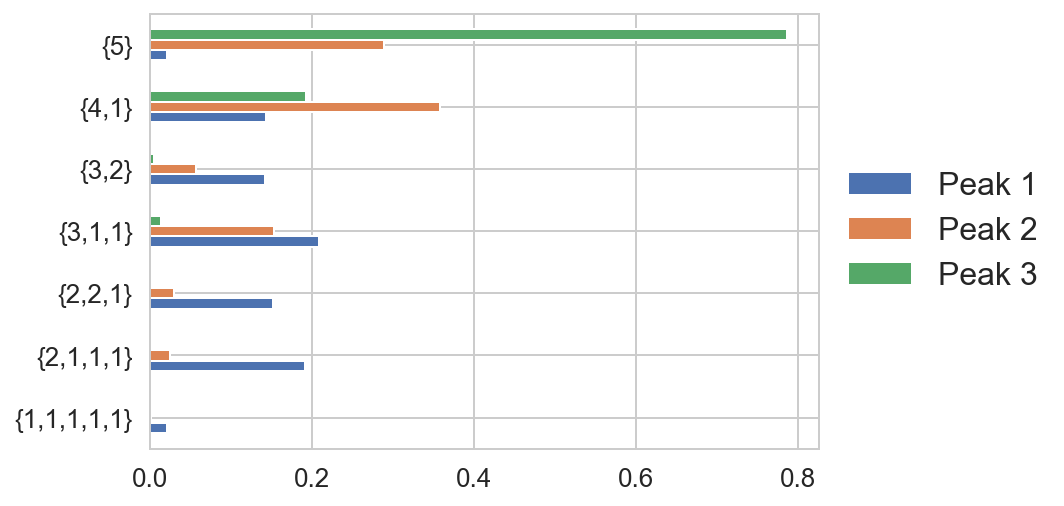

In [87]:
pd.DataFrame(med).plot.barh()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=fs_legend)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(labelsize=fs_tick)
plt.show()

## All chromosomes

In [88]:
hist_all = {}
for ch in ch_list:
    idx1 = param_infer[ch][param_infer[ch].beta < 15].index
    idx2 = param_infer[ch][(param_infer[ch].beta > 15) & (param_infer[ch].beta < 45)].index
    idx3 = param_infer[ch][param_infer[ch].beta > 45].index

    wmask = mask[ch]

    idxs = {
        1: list(set(idx1).intersection(set(wmask[wmask].index))),
        2: list(set(idx2).intersection(set(wmask[wmask].index))),
        3: list(set(idx3).intersection(set(wmask[wmask].index))),
    }
    
    hist_df = []
    for k, idx in idxs.items():
    #     df = hist.loc[set(idx).intersection(set(mask[ch][mask[ch]].index))]
        df = hist[ch].loc[idx]
        df.columns.name = 'partition'
        df.index.name = 'idx'
        df = df.unstack()
        df.name = 'freq'
        df = pd.DataFrame(df)
        df['peak'] = 'Peak {}'.format(k)
        df = df.reset_index()
        hist_df.append(df)
    hist_df = pd.concat(hist_df)
    hist_df = hist_df.reset_index()
    
    hist_all[ch] = hist_df

In [89]:
hist_all = pd.concat(hist_all, ignore_index=True)

In [90]:
med = {}
for p in [1, 2, 3]:
    pn = 'Peak {}'.format(p)
    tmp = hist_all[hist_all.peak == pn]
    med[pn] = tmp.groupby('partition')['freq'].median()

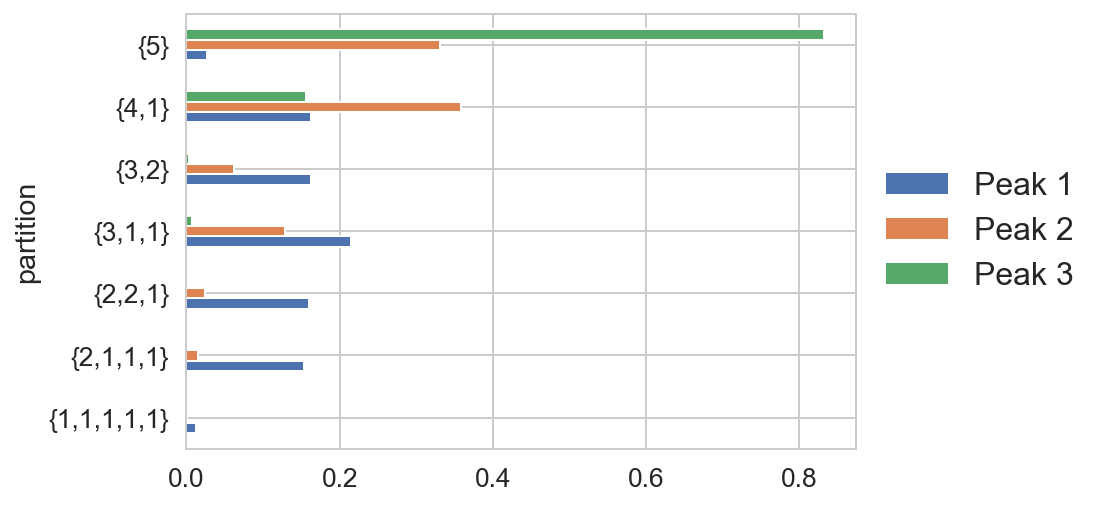

In [91]:
pd.DataFrame(med).plot.barh()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=fs_legend)

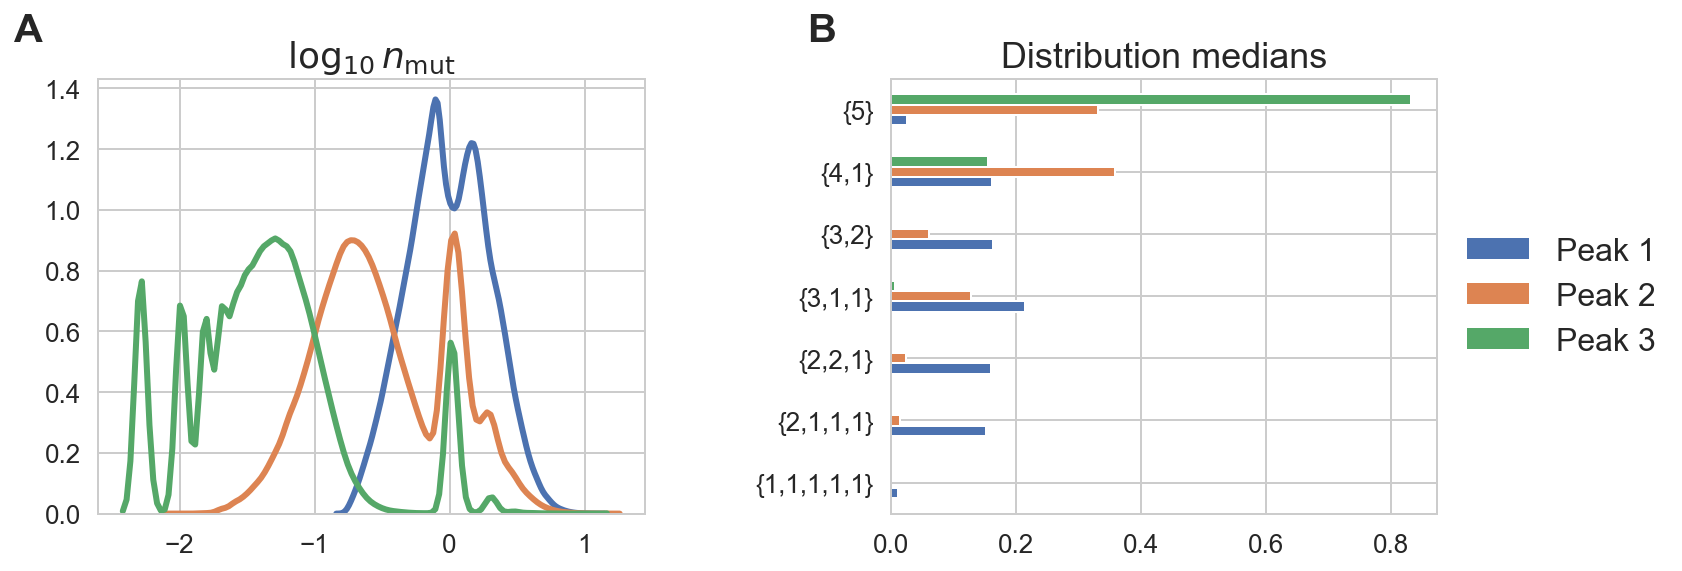

In [92]:
n_col = 2
n_row = 1
fig, ax = plt.subplots(nrows=n_row, ncols=n_col, figsize=(6*n_col, 4*n_row))


kw_label = {
    'x' : -0.1,
    'y' : 1.15,
    'va': 'top',
    'ha': 'right',
    'fontsize'  : 20,
    'fontweight': 'bold', # 'normal', 'bold'
}

kw_plot = {
    'shade' : False,
    'alpha' : 1.0, #0.6,
    'legend': False,
    'lw': 3,
}

# font_size
fs_title = 18
fs_legend = 16
fs_tick = 13

x = ax[0]
for k, v in n_mut_all.items():
    tmp = np.log10(v)
    sns.kdeplot(tmp, label='Peak {}'.format(k), ax=x, **kw_plot)
x.set_title(r'$\log_{10} \, n_\mathrm{mut}$', fontsize=fs_title)
x.text(s='A', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)

x = ax[1]
pd.DataFrame(med).plot.barh(ax=x, fontsize=20)
x.set_title('Distribution medians', fontsize=fs_title)
x.text(s='B', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)
plt.xlabel('')
plt.ylabel('')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=fs_legend)
plt.subplots_adjust(wspace=0.45)
plt.savefig('figures/n_mut_and_hist.pdf', bbox_inches='tight');

# Peaks and functional regions

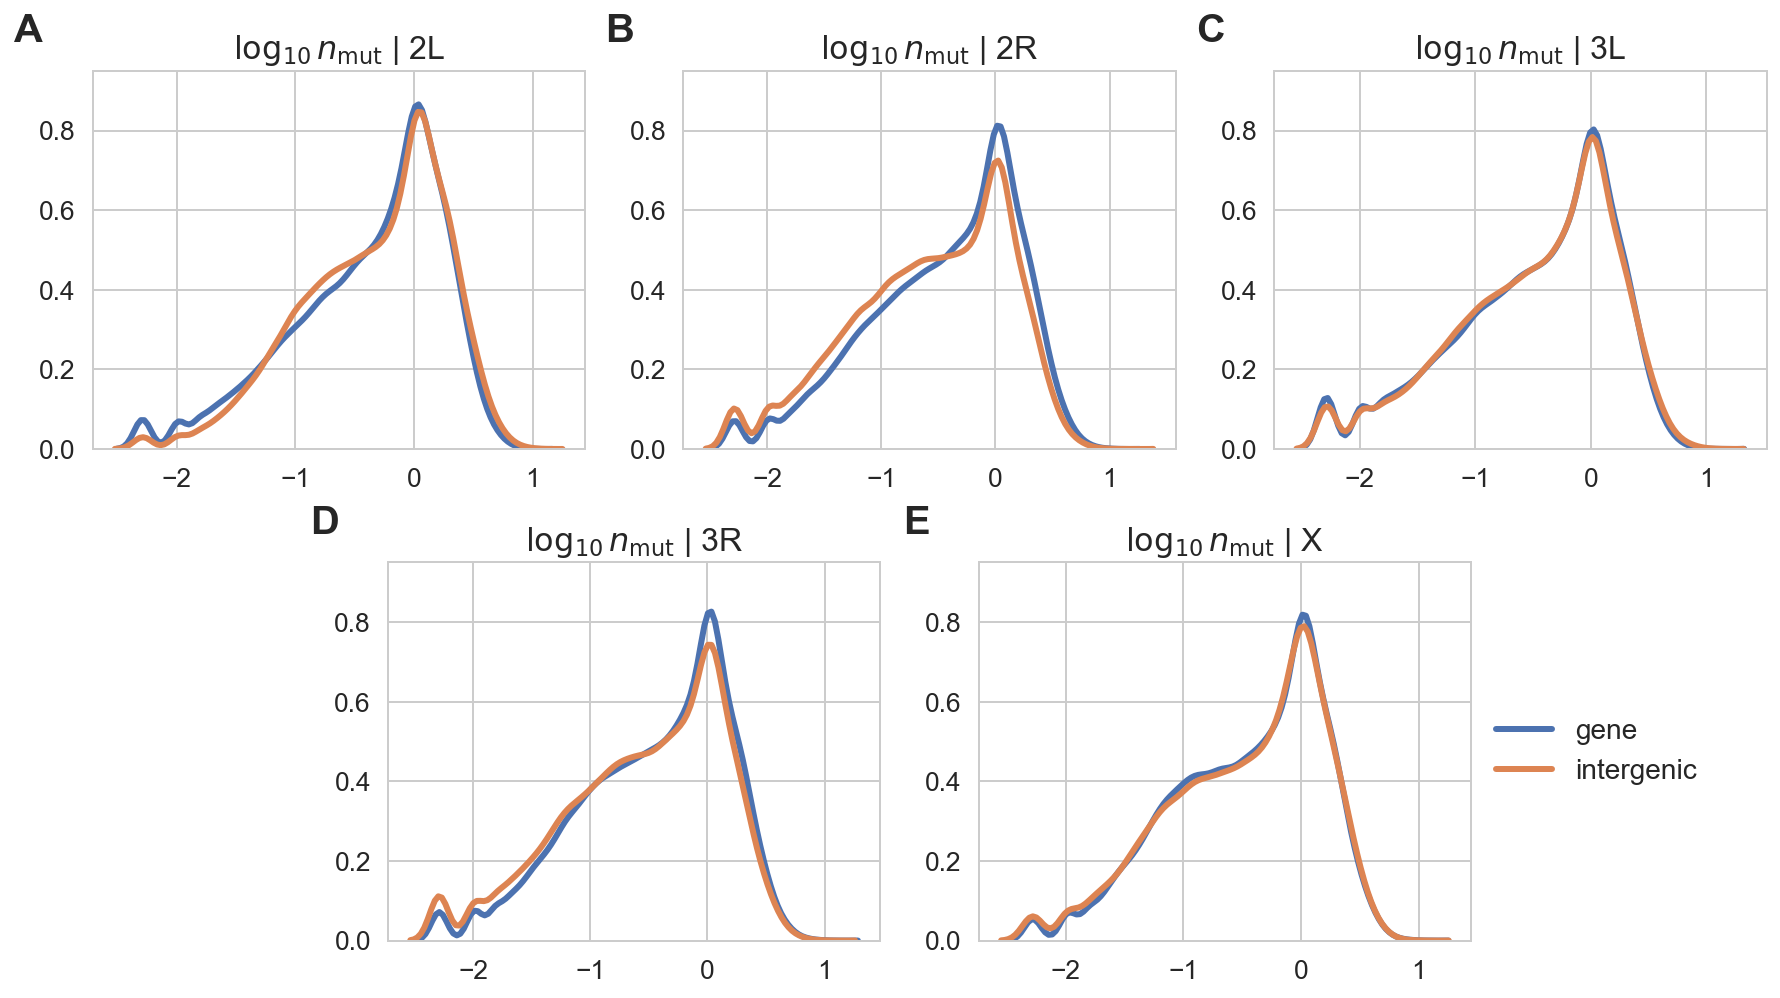

In [93]:
gene = load_data('gene')
intergenic = load_data('intergenic')

ch2ax = OrderedDict({
    '2L': (0, slice(0, 2)),
    '2R': (0, slice(2, 4)),
    '3L': (0, slice(4, 6)),
    '3R': (1, slice(1, 3)),
    'X' : (1, slice(3, 5)),
})

letters = list(map(chr, range(65, 91)))[:len(ch2ax)]

fig = plt.figure(figsize=((6/2) * 5, (4/2) * 4))
grid = plt.GridSpec(2, 6, wspace=0.5, hspace=0.3)

for ch, coord in ch2ax.items():
    x = fig.add_subplot(grid[coord])
    
#     idx = set(overlap[ch]['exon']['full']) & set(mask[ch][mask[ch]].index)
#     tmp = np.log10(n_mut_avg[ch].loc[idx])
#     sns.kdeplot(tmp, label='exon', ax=x, **kw_plot)
    
    idx = set(overlap[ch]['gene']['full']) & set(mask[ch][mask[ch]].index)
    tmp = np.log10(n_mut_avg[ch].loc[idx])
    sns.kdeplot(tmp, label='gene', ax=x, **kw_plot)

    
#     idx = set(overlap[ch]['intron']['full']) & set(mask[ch][mask[ch]].index)
#     tmp = np.log10(n_mut_avg[ch].loc[idx])
#     sns.kdeplot(tmp, label='intron', ax=x, **kw_plot)
    
    idx = set(overlap[ch]['intergenic']['full']) & set(mask[ch][mask[ch]].index)
    tmp = np.log10(n_mut_avg[ch].loc[idx])
    sns.kdeplot(tmp, label='intergenic', ax=x, **kw_plot)

#     x.legend('')
    x.set_title(r'$\log_{10} \, n_\mathrm{mut}$ | ' + '{ch}'.format(ch=ch, r=corr), fontsize=font_size)
    x.text(s=letters[ch_list.index(ch)], transform=x.transAxes, **kw_label)
    
    x.set_ylim([0.0, 0.95])
    
    if ch in ['X']:
            x.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=font_size_legend)
plt.savefig('figures/n_mut_functional_gene.pdf', bbox_inches='tight');

In [107]:
zz = list(set(overlap['2L']['exon']['full']).intersection(set(overlap['2L']['intron']['full'])))

In [108]:
pd.Series(sorted(zz)).to_csv('exon_intron_overlaped_windows_2L.csv', index=False)

/Users/pasha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [109]:
ch = '2L'

overlap[ch] = {}

In [ ]:
exon = load_data('exon')
intergenic = load_data('intergenic')

exon = exon[exon.ch == ch]
intergenic = intergenic[intergenic.ch == ch]

In [ ]:
window = param_infer[ch].copy()
window['start'] = window.index * 100
window['end']   = window.index * 100 + 99
window.head()

In [ ]:
%%time

overlap[ch] = {
    'exon'      : get_overlap(features=exon, windows=window),
    'intergenic': get_overlap(features=intergenic, windows=window),
}

In [ ]:
ch = 'X'

idx = set(overlap[ch]['exon']['full']) & set(mask[ch][mask[ch]].index)
tmp = np.log10(n_mut_avg[ch].loc[idx])
sns.kdeplot(tmp, label='exon', **kw_plot)

idx = set(overlap[ch]['intergenic']['full']) & set(mask[ch][mask[ch]].index)
tmp = np.log10(n_mut_avg[ch].loc[idx])
sns.kdeplot(tmp, label='intergenic', **kw_plot)

plt.tick_params(labelsize=fs_tick)
plt.title(r'$\log_{10} \, n_\mathrm{mut}$ | ' + ch, fontsize=fs_title)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=fs_legend)
# plt.savefig('figures/n_mut_functional_{ch}.pdf'.format(ch=ch), bbox_inches='tight');
plt.show()

## Table

In [98]:
ch = 'X'

idxs = {
    1: param_infer[ch][param_infer[ch].beta < 15].index,
    2: param_infer[ch][(param_infer[ch].beta > 15) & (param_infer[ch].beta < 45)].index,
    3: param_infer[ch][param_infer[ch].beta > 45].index,
}

idxs = {k: list(v) for k, v in idxs.items()}

if set(param_infer[ch].index) != set(itertools.chain.from_iterable(idxs.values())):
    print("Error: idxs don't constitute tiling.")

idx_table = set(overlap[ch]['gene']['full']) | set(overlap[ch]['intergenic']['full'])

table = {}
# for k in itertools.product(idxs.keys(), overlap[ch].keys()):
for k in itertools.product(idxs.keys(), ['gene', 'intergenic']):
#     print(k)
    p, f = k
    table[k] = set(idxs[p]) & set(overlap[ch][f]['full']) & idx_table
    
    if sum(len(v) for k, v in table.items()) != len(idx_table):
        print('Error: something went wrong for {}'.format(k))

Error: something went wrong for (1, 'gene')
Error: something went wrong for (1, 'intergenic')
Error: something went wrong for (2, 'gene')
Error: something went wrong for (2, 'intergenic')
Error: something went wrong for (3, 'gene')


In [103]:
n_mut_box = {k: n_mut_avg[ch].loc[set(v) & set(mask[ch][mask[ch]].index)] for k, v in table.items()}

In [105]:
for k, v in n_mut_box.items():
    print('\n === Chromosome {ch} and {k} === \n'.format(ch=ch, k=k))
    
#     print('Mean and 95 conf\n{avg:0.2f} ({q5:0.2f}, {q95:0.2f})'.format(
#         avg=v.mean(),
#         q5=v.quantile(0.05),
#         q95=v.quantile(0.95)))

    print('\nMedian and quantiles\n{avg:0.2f} ({q5:0.2f}, {q95:0.2f})'.format(
        avg=v.median(),
        q5=v.quantile(0.25),
        q95=v.quantile(0.75)))


 === Chromosome X and (1, 'gene') === 


Median and quantiles
0.99 (0.64, 1.64)

 === Chromosome X and (1, 'intergenic') === 


Median and quantiles
0.99 (0.64, 1.64)

 === Chromosome X and (2, 'gene') === 


Median and quantiles
0.31 (0.16, 0.96)

 === Chromosome X and (2, 'intergenic') === 


Median and quantiles
0.31 (0.16, 0.96)

 === Chromosome X and (3, 'gene') === 


Median and quantiles
0.05 (0.03, 0.09)

 === Chromosome X and (3, 'intergenic') === 


Median and quantiles
0.05 (0.03, 0.09)


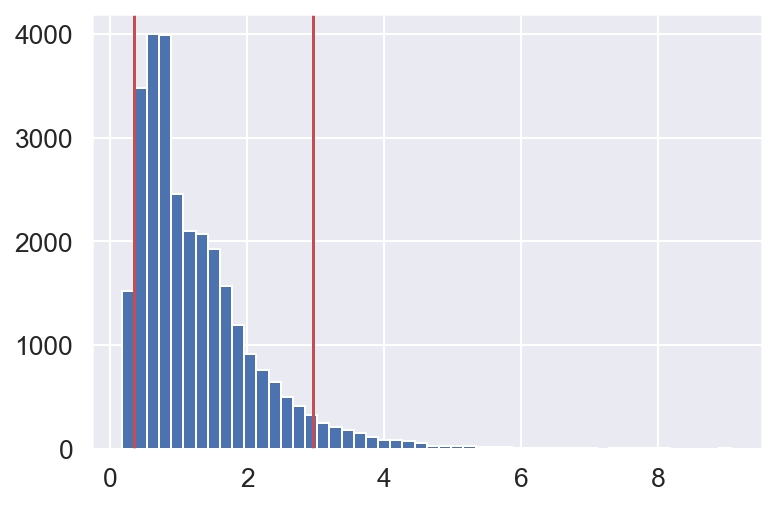

In [107]:
tmp = n_mut_box[(1, 'gene')]

tmp.hist(bins=50)
plt.axvline(tmp.quantile(0.05), c='r')
plt.axvline(tmp.quantile(0.95), c='r')

In [108]:
# mean
n_mut_table = pd.Series({k: n_mut_avg[ch].loc[set(v) & set(mask[ch][mask[ch]].index)].mean() for k, v in table.items()})
n_mut_table_std = pd.Series({k: n_mut_avg[ch].loc[set(v) & set(mask[ch][mask[ch]].index)].std() for k, v in table.items()})

# # median
# n_mut_table = pd.Series({k: n_mut_avg[ch].loc[set(v) & set(mask[ch][mask[ch]].index)].median() for k, v in table.items()})
# n_mut_table_std = pd.Series({k: n_mut_avg[ch].loc[set(v) & set(mask[ch][mask[ch]].index)].std() for k, v in table.items()})

In [109]:
log_n_mut_table = pd.Series({k: np.log10(n_mut_avg[ch].loc[set(v) & set(mask[ch][mask[ch]].index)]).mean() for k, v in table.items()})
log_n_mut_table_std = pd.Series({k: np.log10(n_mut_avg[ch].loc[set(v) & set(mask[ch][mask[ch]].index)]).std() for k, v in table.items()})

In [111]:
(log_n_mut_table / log_n_mut_table_std).unstack()

,gene,intergenic
1,0.025761,0.026759
2,-0.964766,-0.972125
3,-2.565924,-2.489076


In [112]:
(n_mut_table / n_mut_table_std).unstack()

,gene,intergenic
1,1.442084,1.471463
2,0.864773,0.860621
3,0.455328,0.437910


In [113]:
print('Avg number of mut for chromosome {}'.format(ch))
n_mut_table.unstack()[['gene', 'intergenic']]

Avg number of mut for chromosome X


,gene,intergenic
1,1.256912,1.255730
2,0.623573,0.614720
3,0.125973,0.127712


In [114]:
print('Std of number of mut for chromosome {}'.format(ch))
n_mut_table_std.unstack()[['gene', 'intergenic']]

Std of number of mut for chromosome X


,gene,intergenic
1,0.871594,0.853389
2,0.721083,0.714275
3,0.276663,0.291640


In [115]:
n_count = pd.Series({k: len(set(v) & set(mask[ch][mask[ch]].index)) for k, v in table.items()})

In [116]:
print('Number of windows')
n_count.unstack()

Number of windows


,gene,intergenic
1,29224,11620
2,32549,12950
3,18038,7220


# Picture for thesis

In [39]:
def ss_dist(x, Ns, Nu):
    return np.exp(Ns * x + (Nu - 1) * np.log(x * (1 - x)))

In [40]:
x_range = np.linspace(0 + 1e-3, 1 - 1e-3, 100)

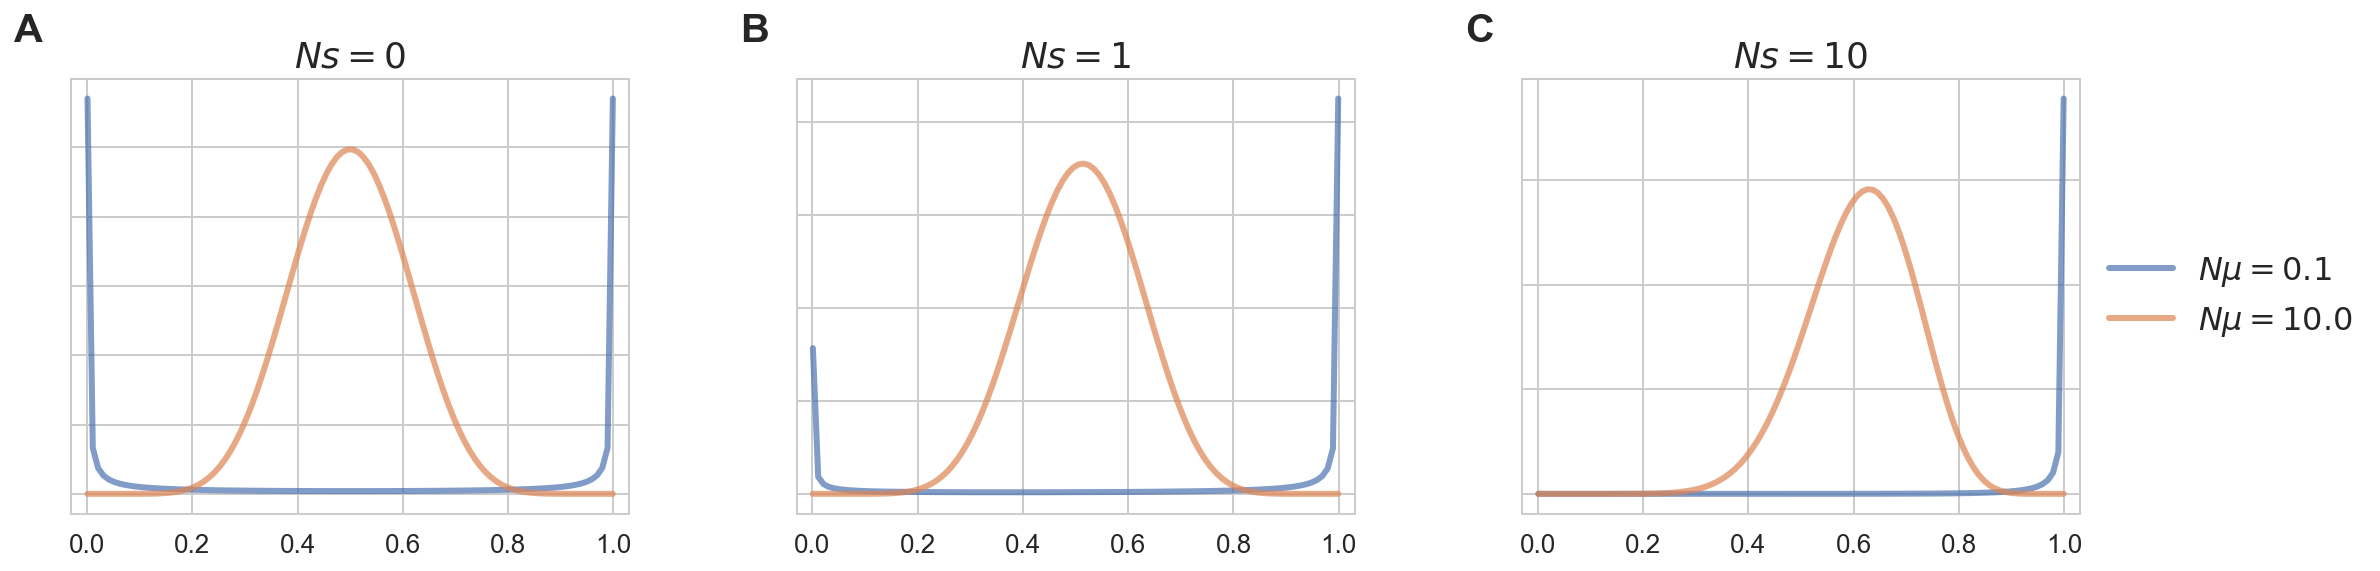

In [41]:
n_col = 3
n_row = 1
fig, ax = plt.subplots(nrows=n_row, ncols=n_col, figsize=(6*n_col, 4*n_row))

kw_label = {
    'x' : -0.05,
    'y' : 1.15,
    'va': 'top',
    'ha': 'right',
    'fontsize'  : 20,
    'fontweight': 'bold', # 'normal', 'bold'
}

kw_plot = {
#     'shade' : False,
    'alpha' : 0.7,
    'legend': False,
    'lw': 3,
}

# font_size
fs_title = 18
fs_legend = 16
fs_tick = 13

x = ax[0]

Ns = 0

y_range_mono = np.array([ss_dist(x, Ns=Ns, Nu=0.1) for x in x_range])
y_range_mono /= np.sum(y_range_mono)

y_range_poly = np.array([ss_dist(x, Ns=Ns, Nu=10.0) for x in x_range])
y_range_poly /= np.sum(y_range_poly)
y_range_poly *= 7

df = pd.DataFrame({
    r'$N\mu = 0.1$': pd.Series(y_range_mono, index=x_range),
    r'$N\mu = 10.0$': pd.Series(y_range_poly, index=x_range),
})
df.plot(ax=x, **kw_plot)

# x.plot(x_range, y_range_mono)
# x.plot(x_range, y_range_poly)

x.yaxis.set_ticklabels([])
x.set_xlim([-0.03, 1.03])
x.set_title(r'$Ns={:0.0f}$'.format(Ns), fontsize=fs_title)
x.text(s='A', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)



x = ax[1]

Ns = 1

y_range_mono = np.array([ss_dist(x, Ns=Ns, Nu=0.1) for x in x_range])
y_range_mono /= np.sum(y_range_mono)

y_range_poly = np.array([ss_dist(x, Ns=Ns, Nu=10.0) for x in x_range])
y_range_poly /= np.sum(y_range_poly)
y_range_poly *= 10

df = pd.DataFrame({
    r'$N\mu = 0.1$': pd.Series(y_range_mono, index=x_range),
    r'$N\mu = 10.0$': pd.Series(y_range_poly, index=x_range),
})
df.plot(ax=x, **kw_plot)

x.yaxis.set_ticklabels([])
x.set_xlim([-0.03, 1.03])
x.set_title(r'$Ns={:0.0f}$'.format(Ns), fontsize=fs_title)
x.text(s='B', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)
# plt.xlabel('')
# plt.ylabel('')


x = ax[2]

Ns = 10

y_range_mono = np.array([ss_dist(x, Ns=Ns, Nu=0.1) for x in x_range])
y_range_mono /= np.sum(y_range_mono)

y_range_poly = np.array([ss_dist(x, Ns=Ns, Nu=10.0) for x in x_range])
y_range_poly /= np.sum(y_range_poly)
y_range_poly *= 15

df = pd.DataFrame({
    r'$N\mu = 0.1$': pd.Series(y_range_mono, index=x_range),
    r'$N\mu = 10.0$': pd.Series(y_range_poly, index=x_range),
})
df.plot(ax=x, **kw_plot)

x.yaxis.set_ticklabels([])
x.set_xlim([-0.03, 1.03])
x.set_title(r'$Ns={:0.0f}$'.format(Ns), fontsize=fs_title)
x.text(s='C', transform=x.transAxes, **kw_label)
x.tick_params(labelsize=fs_tick)
# plt.xlabel('')
# plt.ylabel('')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0.0, fancybox=False, fontsize=fs_legend)
plt.subplots_adjust(wspace=0.3)
plt.savefig('figures/pdfs.pdf', bbox_inches='tight');
# plt.show()